<a href="https://colab.research.google.com/github/DABer1805/bootcamp_ml/blob/main/Berezhnoy_Dmitry_EDA_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

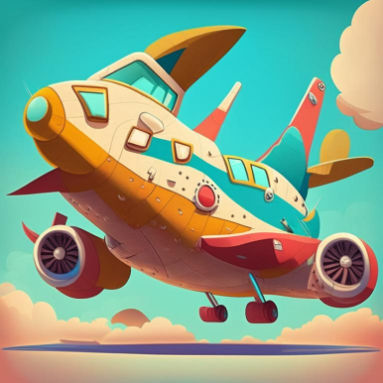

---

# ***Клиенты авиакомпании***

---



Датасет содержит информацию о клиентах некоторой авиакомпании

## Импорт библиотек, константы

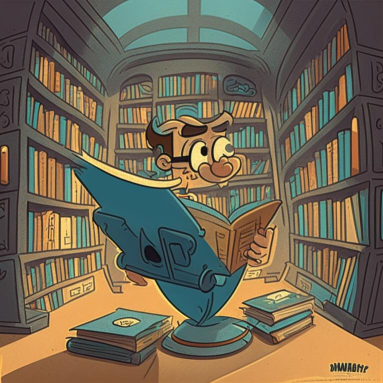

In [315]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import pickle

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

In [167]:
RANDOM_STATE = 42

In [168]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/stepik_from_idea_to_mvp/main/datasets/clients.csv"

In [169]:
MARKS_COLUMNS_NAMES = [1.0, 2.0, 3.0, 4.0, 5.0]

## Загрузка и обзор данных

### Загрузка

In [170]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

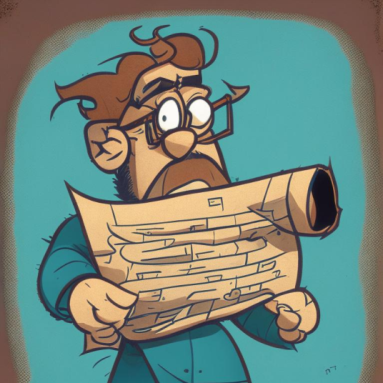

**Целевая переменная**
- `satisfaction`: удовлетворенность клиента полетом, бинарная (*satisfied* или *neutral or dissatisfied*)

**Признаки**
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

In [171]:
# информация о столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

In [172]:
df

id  Gender   Age      Customer Type   Type of Travel     Class  \
0            1    Male  48.0  disloyal Customer  Business travel  Business   
1            2  Female  35.0     Loyal Customer  Business travel  Business   
2            3    Male  41.0     Loyal Customer  Business travel  Business   
3            4    Male  50.0     Loyal Customer  Business travel  Business   
4            5  Female  49.0     Loyal Customer  Business travel  Business   
...        ...     ...   ...                ...              ...       ...   
129875  129876    Male  28.0     Loyal Customer  Personal Travel  Eco Plus   
129876  129877    Male  41.0     Loyal Customer  Personal Travel  Eco Plus   
129877  129878    Male  42.0     Loyal Customer  Personal Travel  Eco Plus   
129878  129879    Male  50.0     Loyal Customer  Personal Travel  Eco Plus   
129879  129880  Female  20.0     Loyal Customer  Personal Travel  Eco Plus   

        Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  \
0                 821.0                         2.0                       5.0   
1                 821.0                        26.0                      39.0   
2                 853.0                         0.0                       0.0   
3                1905.0                         0.0                       0.0   
4                3470.0                         0.0                       1.0   
...                 ...                         ...                       ...   
129875            447.0                         2.0                       3.0   
129876            308.0                         0.0                       0.0   
129877            337.0                         6.0                      14.0   
129878            337.0                        31.0                      22.0   
129879            337.0                         0.0                       0.0   

        Inflight wifi service  ...  Online boarding  Seat comfort  \
0                         3.0  ...              3.0           5.0   
1                         2.0  ...              5.0           4.0   
2                         4.0  ...              5.0           5.0   
3                         2.0  ...              4.0           5.0   
4                         3.0  ...              5.0           4.0   
...                       ...  ...              ...           ...   
129875                    4.0  ...              4.0           1.0   
129876                    3.0  ...              3.0           2.0   
129877                    2.0  ...              2.0           3.0   
129878                    5.0  ...              4.0           4.0   
129879                    3.0  ...              3.0           2.0   

        Inflight entertainment  On-board service  Leg room service  \
0                          5.0               3.0               2.0   
1                          5.0               5.0               5.0   
2                          3.0               3.0               3.0   
3                          5.0               5.0               5.0   
4                          3.0               3.0               4.0   
...                        ...               ...               ...   
129875                     4.0               5.0               4.0   
129876                     2.0               5.0               5.0   
129877                     3.0               3.0               4.0   
129878                     3.0               4.0               5.0   
129879                     2.0               4.0               4.0   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                    5.0              4.0               5.0          5.0   
1                    5.0              3.0               5.0          5.0   
2                    3.0              4.0               3.0          5.0   
3                    5.0              3.0               5.0          4.0   
4                    3.0              3.0           

In [173]:
df.shape

(129880, 24)

# ***Обрабатываем первые 9 колонок***

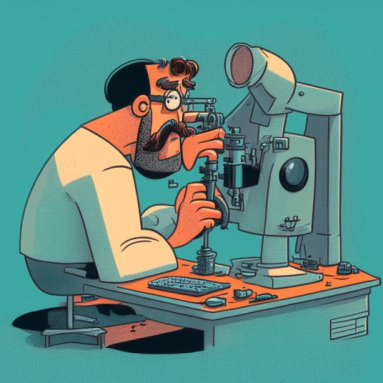

## Уберём строки с пропусками

In [174]:
df = df.dropna(axis=0)

In [175]:
df.shape

(127604, 24)

## Переведём значения колонки с целевой переменной в бинарный вид

In [176]:
# Проверяем соответствие значений колонки с описанием датасета
df['satisfaction'].value_counts()

neutral or dissatisfied    57835
satisfied                  44250
-                          25519
Name: satisfaction, dtype: int64

In [177]:
# Есть прочерки - нехорошо, т.к. это - целевая переменная. Лучше такие строки убрать
df = df[df['satisfaction'] != '-']

In [178]:
# Убедимся, что теперь всё ОК
df['satisfaction'].value_counts()

neutral or dissatisfied    57835
satisfied                  44250
Name: satisfaction, dtype: int64

In [179]:
df.shape

(102085, 24)

In [180]:
df['satisfaction'] = df['satisfaction'].apply(lambda x: int(x == 'satisfied'))

<ipython-input-180-8634648bf51d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['satisfaction'] = df['satisfaction'].apply(lambda x: int(x == 'satisfied'))


In [181]:
df

id  Gender   Age      Customer Type   Type of Travel     Class  \
0            1    Male  48.0  disloyal Customer  Business travel  Business   
1            2  Female  35.0     Loyal Customer  Business travel  Business   
2            3    Male  41.0     Loyal Customer  Business travel  Business   
3            4    Male  50.0     Loyal Customer  Business travel  Business   
4            5  Female  49.0     Loyal Customer  Business travel  Business   
...        ...     ...   ...                ...              ...       ...   
129873  129874  Female  28.0     Loyal Customer  Personal Travel  Eco Plus   
129874  129875  Female  55.0     Loyal Customer  Personal Travel  Eco Plus   
129877  129878    Male  42.0     Loyal Customer  Personal Travel  Eco Plus   
129878  129879    Male  50.0     Loyal Customer  Personal Travel  Eco Plus   
129879  129880  Female  20.0     Loyal Customer  Personal Travel  Eco Plus   

        Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  \
0                 821.0                         2.0                       5.0   
1                 821.0                        26.0                      39.0   
2                 853.0                         0.0                       0.0   
3                1905.0                         0.0                       0.0   
4                3470.0                         0.0                       1.0   
...                 ...                         ...                       ...   
129873            337.0                         0.0                       0.0   
129874            308.0                         0.0                       0.0   
129877            337.0                         6.0                      14.0   
129878            337.0                        31.0                      22.0   
129879            337.0                         0.0                       0.0   

        Inflight wifi service  ...  Online boarding  Seat comfort  \
0                         3.0  ...              3.0           5.0   
1                         2.0  ...              5.0           4.0   
2                         4.0  ...              5.0           5.0   
3                         2.0  ...              4.0           5.0   
4                         3.0  ...              5.0           4.0   
...                       ...  ...              ...           ...   
129873                    4.0  ...              4.0           3.0   
129874                    3.0  ...              4.0           3.0   
129877                    2.0  ...              2.0           3.0   
129878                    5.0  ...              4.0           4.0   
129879                    3.0  ...              3.0           2.0   

        Inflight entertainment  On-board service  Leg room service  \
0                          5.0               3.0               2.0   
1                          5.0               5.0               5.0   
2                          3.0               3.0               3.0   
3                          5.0               5.0               5.0   
4                          3.0               3.0               4.0   
...                        ...               ...               ...   
129873                     3.0               1.0               5.0   
129874                     4.0               4.0               3.0   
129877                     3.0               3.0               4.0   
129878                     3.0               4.0               5.0   
129879                     2.0               4.0               4.0   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                    5.0              4.0               5.0          5.0   
1                    5.0              3.0               5.0          5.0   
2                    3.0              4.0               3.0          5.0   
3                    5.0              3.0               5.0          4.0   
4                    3.0              3.0           

## Переведём пол клиента в бинарный вид

In [182]:
# Проверяем соответствие значений колонки с описанием датасета
df['Gender'].value_counts()

Female    51830
Male      50255
Name: Gender, dtype: int64

In [183]:
# Закодируем бинарно пол клиента, пусть Male = 0, Female = 1
df['Gender'] = df['Gender'].apply(lambda x: int(x == 'Female'))

In [184]:
df

id  Gender   Age      Customer Type   Type of Travel     Class  \
0            1       0  48.0  disloyal Customer  Business travel  Business   
1            2       1  35.0     Loyal Customer  Business travel  Business   
2            3       0  41.0     Loyal Customer  Business travel  Business   
3            4       0  50.0     Loyal Customer  Business travel  Business   
4            5       1  49.0     Loyal Customer  Business travel  Business   
...        ...     ...   ...                ...              ...       ...   
129873  129874       1  28.0     Loyal Customer  Personal Travel  Eco Plus   
129874  129875       1  55.0     Loyal Customer  Personal Travel  Eco Plus   
129877  129878       0  42.0     Loyal Customer  Personal Travel  Eco Plus   
129878  129879       0  50.0     Loyal Customer  Personal Travel  Eco Plus   
129879  129880       1  20.0     Loyal Customer  Personal Travel  Eco Plus   

        Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  \
0                 821.0                         2.0                       5.0   
1                 821.0                        26.0                      39.0   
2                 853.0                         0.0                       0.0   
3                1905.0                         0.0                       0.0   
4                3470.0                         0.0                       1.0   
...                 ...                         ...                       ...   
129873            337.0                         0.0                       0.0   
129874            308.0                         0.0                       0.0   
129877            337.0                         6.0                      14.0   
129878            337.0                        31.0                      22.0   
129879            337.0                         0.0                       0.0   

        Inflight wifi service  ...  Online boarding  Seat comfort  \
0                         3.0  ...              3.0           5.0   
1                         2.0  ...              5.0           4.0   
2                         4.0  ...              5.0           5.0   
3                         2.0  ...              4.0           5.0   
4                         3.0  ...              5.0           4.0   
...                       ...  ...              ...           ...   
129873                    4.0  ...              4.0           3.0   
129874                    3.0  ...              4.0           3.0   
129877                    2.0  ...              2.0           3.0   
129878                    5.0  ...              4.0           4.0   
129879                    3.0  ...              3.0           2.0   

        Inflight entertainment  On-board service  Leg room service  \
0                          5.0               3.0               2.0   
1                          5.0               5.0               5.0   
2                          3.0               3.0               3.0   
3                          5.0               5.0               5.0   
4                          3.0               3.0               4.0   
...                        ...               ...               ...   
129873                     3.0               1.0               5.0   
129874                     4.0               4.0               3.0   
129877                     3.0               3.0               4.0   
129878                     3.0               4.0               5.0   
129879                     2.0               4.0               4.0   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                    5.0              4.0               5.0          5.0   
1                    5.0              3.0               5.0          5.0   
2                    3.0              4.0               3.0          5.0   
3                    5.0              3.0               5.0          4.0   
4                    3.0              3.0           

## Удалим колонку с ID клиента (логически ясно, что веса эта колонка не имеет)

In [185]:
df = df.drop(['id'], axis=1)

In [186]:
df

Gender   Age      Customer Type   Type of Travel     Class  \
0            0  48.0  disloyal Customer  Business travel  Business   
1            1  35.0     Loyal Customer  Business travel  Business   
2            0  41.0     Loyal Customer  Business travel  Business   
3            0  50.0     Loyal Customer  Business travel  Business   
4            1  49.0     Loyal Customer  Business travel  Business   
...        ...   ...                ...              ...       ...   
129873       1  28.0     Loyal Customer  Personal Travel  Eco Plus   
129874       1  55.0     Loyal Customer  Personal Travel  Eco Plus   
129877       0  42.0     Loyal Customer  Personal Travel  Eco Plus   
129878       0  50.0     Loyal Customer  Personal Travel  Eco Plus   
129879       1  20.0     Loyal Customer  Personal Travel  Eco Plus   

        Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  \
0                 821.0                         2.0                       5.0   
1                 821.0                        26.0                      39.0   
2                 853.0                         0.0                       0.0   
3                1905.0                         0.0                       0.0   
4                3470.0                         0.0                       1.0   
...                 ...                         ...                       ...   
129873            337.0                         0.0                       0.0   
129874            308.0                         0.0                       0.0   
129877            337.0                         6.0                      14.0   
129878            337.0                        31.0                      22.0   
129879            337.0                         0.0                       0.0   

        Inflight wifi service  Departure/Arrival time convenient  ...  \
0                         3.0                                3.0  ...   
1                         2.0                                2.0  ...   
2                         4.0                                4.0  ...   
3                         2.0                                2.0  ...   
4                         3.0                                3.0  ...   
...                       ...                                ...  ...   
129873                    4.0                                2.0  ...   
129874                    3.0                                4.0  ...   
129877                    2.0                                5.0  ...   
129878                    5.0                                4.0  ...   
129879                    3.0                                1.0  ...   

        Online boarding  Seat comfort  Inflight entertainment  \
0                   3.0           5.0                     5.0   
1                   5.0           4.0                     5.0   
2                   5.0           5.0                     3.0   
3                   4.0           5.0                     5.0   
4                   5.0           4.0                     3.0   
...                 ...           ...                     ...   
129873              4.0           3.0                     3.0   
129874              4.0           3.0                     4.0   
129877              2.0           3.0                     3.0   
129878              4.0           4.0                     3.0   
129879              3.0           2.0                     2.0   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                    3.0               2.0               5.0              4.0   
1                    5.0               5.0               5.0              3.0   
2                    3.0               3.0               3.0              4.0   
3                    5.0               5.0               5.0              3.0   
4                    3.0               4.0               3.0              3.0   
...                  ...               ...        

## Проверим, всё ли нормально с возрастом клиентов

In [187]:
# Проверим, всё ли нормально с возрастом клиентов
df['Age'].value_counts()

39.0     2900
25.0     2729
40.0     2517
44.0     2417
41.0     2415
         ... 
333.0       1
224.0       1
255.0       1
490.0       1
171.0       1
Name: Age, Length: 247, dtype: int64

In [188]:
# Так, у нас что-то много анамальных долгожителей. На данный момент (если вики не врёт...) самый долгий
# период жизни человека - 122 года. Пусть это - верхняя граница, 0 - будет нижней границей
# Почистим данные от таких выбросов
df = df[(df['Age'] > 0) & (df['Age'] < 123)]

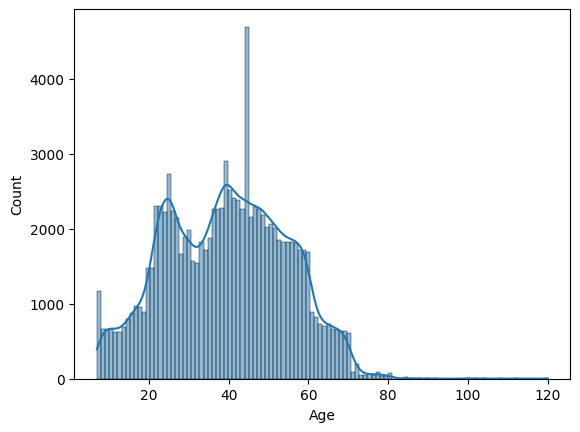

In [189]:
# Вроде, всё ОК
sns.histplot(df['Age'], kde=True)
plt.show()

In [190]:
df.shape

(101759, 23)

## Переведём тип клиента в бинарный вид

In [191]:
# Проверим, всё ли нормально с возрастом клиентов
df['Customer Type'].value_counts()

Loyal Customer       83170
disloyal Customer    18589
Name: Customer Type, dtype: int64

In [192]:
# Закодируем бинарно тип лояльности клиента, Loyal Customer - 1, disloyal Customer - 0
df['Customer Type'] = df['Customer Type'].apply(lambda x: int(x == 'Loyal Customer'))

<ipython-input-192-d3c04f786a5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer Type'] = df['Customer Type'].apply(lambda x: int(x == 'Loyal Customer'))


In [193]:
df

Gender   Age  Customer Type   Type of Travel     Class  \
0            0  48.0              0  Business travel  Business   
1            1  35.0              1  Business travel  Business   
2            0  41.0              1  Business travel  Business   
3            0  50.0              1  Business travel  Business   
4            1  49.0              1  Business travel  Business   
...        ...   ...            ...              ...       ...   
129873       1  28.0              1  Personal Travel  Eco Plus   
129874       1  55.0              1  Personal Travel  Eco Plus   
129877       0  42.0              1  Personal Travel  Eco Plus   
129878       0  50.0              1  Personal Travel  Eco Plus   
129879       1  20.0              1  Personal Travel  Eco Plus   

        Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  \
0                 821.0                         2.0                       5.0   
1                 821.0                        26.0                      39.0   
2                 853.0                         0.0                       0.0   
3                1905.0                         0.0                       0.0   
4                3470.0                         0.0                       1.0   
...                 ...                         ...                       ...   
129873            337.0                         0.0                       0.0   
129874            308.0                         0.0                       0.0   
129877            337.0                         6.0                      14.0   
129878            337.0                        31.0                      22.0   
129879            337.0                         0.0                       0.0   

        Inflight wifi service  Departure/Arrival time convenient  ...  \
0                         3.0                                3.0  ...   
1                         2.0                                2.0  ...   
2                         4.0                                4.0  ...   
3                         2.0                                2.0  ...   
4                         3.0                                3.0  ...   
...                       ...                                ...  ...   
129873                    4.0                                2.0  ...   
129874                    3.0                                4.0  ...   
129877                    2.0                                5.0  ...   
129878                    5.0                                4.0  ...   
129879                    3.0                                1.0  ...   

        Online boarding  Seat comfort  Inflight entertainment  \
0                   3.0           5.0                     5.0   
1                   5.0           4.0                     5.0   
2                   5.0           5.0                     3.0   
3                   4.0           5.0                     5.0   
4                   5.0           4.0                     3.0   
...                 ...           ...                     ...   
129873              4.0           3.0                     3.0   
129874              4.0           3.0                     4.0   
129877              2.0           3.0                     3.0   
129878              4.0           4.0                     3.0   
129879              3.0           2.0                     2.0   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                    3.0               2.0               5.0              4.0   
1                    5.0               5.0               5.0              3.0   
2                    3.0               3.0               3.0              4.0   
3                    5.0               5.0               5.0              3.0   
4                    3.0               4.0               3.0              3.0   
...                  ...               ...               ...              ...   
129873           

## Переведём тип поездки в бинарный вид

In [194]:
# Проверяем соответствие значений колонки с описанием датасета
df['Type of Travel'].value_counts()

Business travel    70166
Personal Travel    31593
Name: Type of Travel, dtype: int64

In [195]:
# Закодируем бинарно тип поездки, Business travel - 1, Personal travel - 0
df['Type of Travel'] = df['Type of Travel'].apply(lambda x: int(x == 'Business travel'))

<ipython-input-195-834c06c43180>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type of Travel'] = df['Type of Travel'].apply(lambda x: int(x == 'Business travel'))


In [196]:
df

Gender   Age  Customer Type  Type of Travel     Class  \
0            0  48.0              0               1  Business   
1            1  35.0              1               1  Business   
2            0  41.0              1               1  Business   
3            0  50.0              1               1  Business   
4            1  49.0              1               1  Business   
...        ...   ...            ...             ...       ...   
129873       1  28.0              1               0  Eco Plus   
129874       1  55.0              1               0  Eco Plus   
129877       0  42.0              1               0  Eco Plus   
129878       0  50.0              1               0  Eco Plus   
129879       1  20.0              1               0  Eco Plus   

        Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  \
0                 821.0                         2.0                       5.0   
1                 821.0                        26.0                      39.0   
2                 853.0                         0.0                       0.0   
3                1905.0                         0.0                       0.0   
4                3470.0                         0.0                       1.0   
...                 ...                         ...                       ...   
129873            337.0                         0.0                       0.0   
129874            308.0                         0.0                       0.0   
129877            337.0                         6.0                      14.0   
129878            337.0                        31.0                      22.0   
129879            337.0                         0.0                       0.0   

        Inflight wifi service  Departure/Arrival time convenient  ...  \
0                         3.0                                3.0  ...   
1                         2.0                                2.0  ...   
2                         4.0                                4.0  ...   
3                         2.0                                2.0  ...   
4                         3.0                                3.0  ...   
...                       ...                                ...  ...   
129873                    4.0                                2.0  ...   
129874                    3.0                                4.0  ...   
129877                    2.0                                5.0  ...   
129878                    5.0                                4.0  ...   
129879                    3.0                                1.0  ...   

        Online boarding  Seat comfort  Inflight entertainment  \
0                   3.0           5.0                     5.0   
1                   5.0           4.0                     5.0   
2                   5.0           5.0                     3.0   
3                   4.0           5.0                     5.0   
4                   5.0           4.0                     3.0   
...                 ...           ...                     ...   
129873              4.0           3.0                     3.0   
129874              4.0           3.0                     4.0   
129877              2.0           3.0                     3.0   
129878              4.0           4.0                     3.0   
129879              3.0           2.0                     2.0   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                    3.0               2.0               5.0              4.0   
1                    5.0               5.0               5.0              3.0   
2                    3.0               3.0               3.0              4.0   
3                    5.0               5.0               5.0              3.0   
4                    3.0               4.0               3.0              3.0   
...                  ...               ...               ...              ...   
129873               1.0     

## Переведём класс обслуживания в бинарный вид

In [197]:
# Проверяем соответствие значений колонки с описанием датасета
df['Class'].value_counts()

Business    48636
Eco         45790
Eco Plus     7333
Name: Class, dtype: int64

In [198]:
# Кодируем класс обслуживания в OneHotEncoding
columns_names = ['Business', 'Eco', 'Eco Plus']

columns = pd.get_dummies(
  data=df['Class'],
  columns=columns_names
)
df = df.drop(['Class'], axis=1)
for column in columns_names:
  df[column] = columns[column]

In [199]:
df

Gender   Age  Customer Type  Type of Travel  Flight Distance  \
0            0  48.0              0               1            821.0   
1            1  35.0              1               1            821.0   
2            0  41.0              1               1            853.0   
3            0  50.0              1               1           1905.0   
4            1  49.0              1               1           3470.0   
...        ...   ...            ...             ...              ...   
129873       1  28.0              1               0            337.0   
129874       1  55.0              1               0            308.0   
129877       0  42.0              1               0            337.0   
129878       0  50.0              1               0            337.0   
129879       1  20.0              1               0            337.0   

        Departure Delay in Minutes  Arrival Delay in Minutes  \
0                              2.0                       5.0   
1                             26.0                      39.0   
2                              0.0                       0.0   
3                              0.0                       0.0   
4                              0.0                       1.0   
...                            ...                       ...   
129873                         0.0                       0.0   
129874                         0.0                       0.0   
129877                         6.0                      14.0   
129878                        31.0                      22.0   
129879                         0.0                       0.0   

        Inflight wifi service  Departure/Arrival time convenient  \
0                         3.0                                3.0   
1                         2.0                                2.0   
2                         4.0                                4.0   
3                         2.0                                2.0   
4                         3.0                                3.0   
...                       ...                                ...   
129873                    4.0                                2.0   
129874                    3.0                                4.0   
129877                    2.0                                5.0   
129878                    5.0                                4.0   
129879                    3.0                                1.0   

        Ease of Online booking  ...  On-board service  Leg room service  \
0                          3.0  ...               3.0               2.0   
1                          2.0  ...               5.0               5.0   
2                          4.0  ...               3.0               3.0   
3                          2.0  ...               5.0               5.0   
4                          3.0  ...               3.0               4.0   
...                        ...  ...               ...               ...   
129873                     4.0  ...               1.0               5.0   
129874                     3.0  ...               4.0               3.0   
129877                     2.0  ...               3.0               4.0   
129878                     4.0  ...               4.0               5.0   
129879                     3.0  ...               4.0               4.0   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                    5.0              4.0               5.0          5.0   
1                    5.0              3.0               5.0          5.0   
2                    3.0              4.0               3.0          5.0   
3                    5.0              3.0               5.0          4.0   
4                    3.0              3.0               3.0          5.0   
...                  ...              ...               ...          ...   
129873               3.0              4.0               4.0          3.0   
129874               4.0              4.0       

## Проверим на выбросы дальность полёта

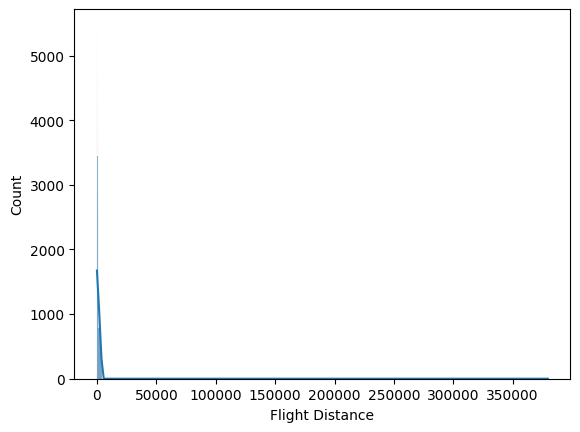

In [200]:
# Посмотрим, какие значения содержатся в колонке
sns.histplot(df['Flight Distance'], kde=True)
plt.show()

In [201]:
print(
    f'Максимальная дальность полёта: {max(df["Flight Distance"])} (мили)\n'
    f'Минимальная дальность полёта: {min(df["Flight Distance"])} (мили)'
)

Максимальная дальность полёта: 379620.0 (мили)
Минимальная дальность полёта: 0.0 (мили)


In [202]:
# Как мы видим, очень много выбросов, отсечём неправильные значения,
# основываясь по данным википедии (минимальная дальность полёта - 270 миль,
# максимальная дальность полёта - 9534 мили)
df = df[(df['Flight Distance'] > 270) & (df['Flight Distance'] < 9534)]

In [203]:
df.shape

(88500, 25)

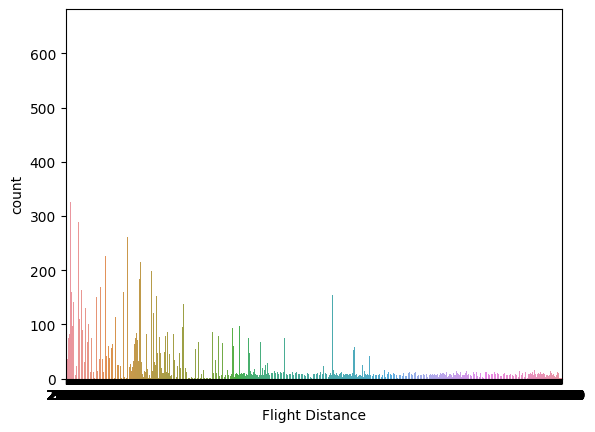

In [204]:
# Другое дело
sns.countplot(x=df['Flight Distance'], data=df)
plt.show()

## Проверим задержку отправления

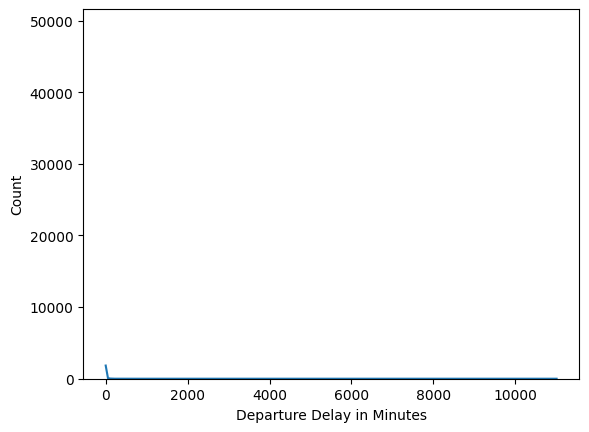

In [205]:
# Посмотрим, какие значения содержатся в колонке
sns.histplot(df['Departure Delay in Minutes'], kde=True)
plt.show()

In [206]:
# И снова выбросы. Очень длительная задержка рейса - 8 часов, или 480 минут.
# Пусть это будет верхней границей, всё равно, то что будет больше явно
# клиенту не понравится =). 0 будет нижней границей.
# Так что снова подсократим данные
df = df[(df['Departure Delay in Minutes'] >= 0) & (df['Departure Delay in Minutes'] < 480)]

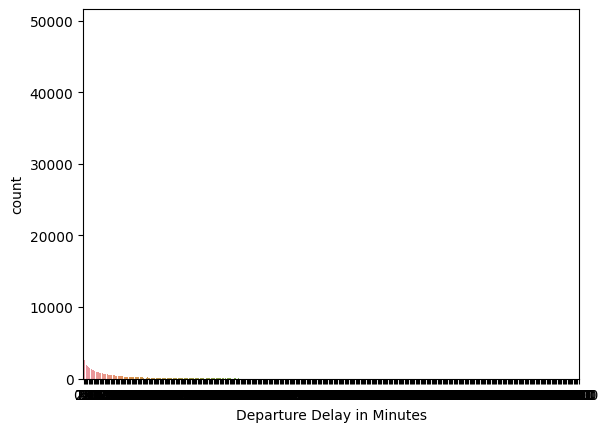

In [207]:
# Теперь всё ОК
sns.countplot(x=df['Departure Delay in Minutes'], data=df)
plt.show()

## Проверим задержку прибытия

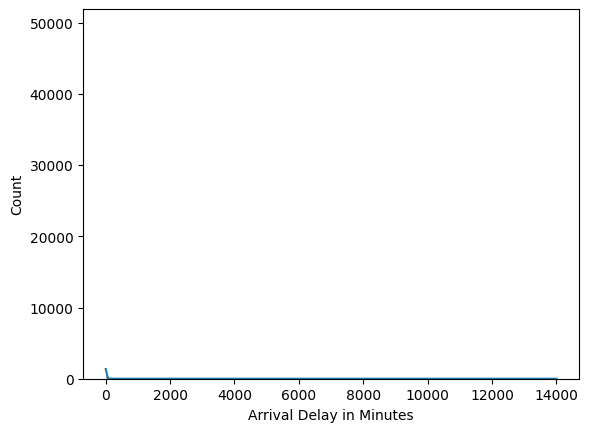

In [208]:
# Посмотрим, какие значения содержатся в колонке
sns.histplot(df['Arrival Delay in Minutes'], kde=True)
plt.show()

In [209]:
# Пусть границы будут такие же, как и в предыдущем случае
df = df[(df['Arrival Delay in Minutes'] >= 0) & (df['Arrival Delay in Minutes'] < 480)]

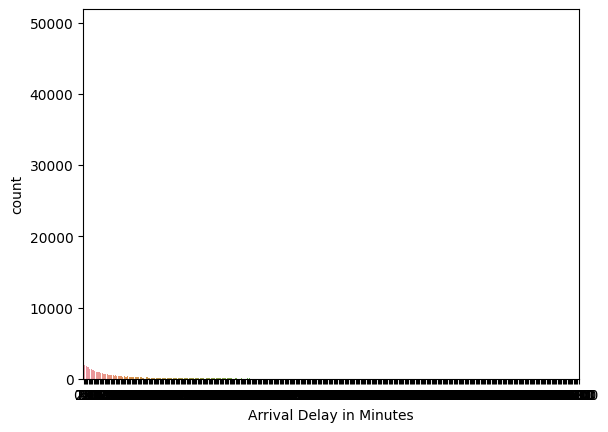

In [210]:
sns.countplot(x=df['Arrival Delay in Minutes'], data=df)
plt.show()

# ***Обрабатываем категориальные признаки с оценками пользователей от 1 до 5***

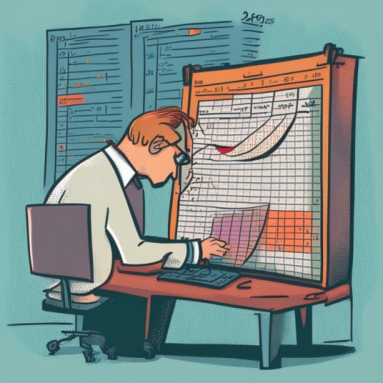

## Оценка клиентом интернета на борту

In [211]:
# Проверяем значения на выбросы
df['Inflight wifi service'].value_counts()

3.0     22091
2.0     22042
4.0     16681
1.0     15321
5.0      9777
0.0      2436
6.0         6
7.0         3
21.0        3
40.0        2
16.0        2
12.0        2
18.0        1
20.0        1
28.0        1
25.0        1
45.0        1
10.0        1
15.0        1
Name: Inflight wifi service, dtype: int64

In [212]:
# Некорректные данные вырезаем
df = df[(df['Inflight wifi service'] >= 1) & (df['Inflight wifi service'] <= 5)]

In [213]:
df.shape

(85912, 25)

In [214]:
# Удостоверяемся, что теперь всё хорошо
df['Inflight wifi service'].value_counts()

3.0    22091
2.0    22042
4.0    16681
1.0    15321
5.0     9777
Name: Inflight wifi service, dtype: int64

In [215]:
# Кодируем класс обслуживания в OneHotEncoding
columns = pd.get_dummies(
  data=df['Inflight wifi service'],
  columns=MARKS_COLUMNS_NAMES
)
df = df.drop(['Inflight wifi service'], axis=1)
for column in MARKS_COLUMNS_NAMES:
  df[f'Inflight wifi service: {column}'] = columns[column]

In [216]:
df

Gender   Age  Customer Type  Type of Travel  Flight Distance  \
0            0  48.0              0               1            821.0   
1            1  35.0              1               1            821.0   
2            0  41.0              1               1            853.0   
3            0  50.0              1               1           1905.0   
4            1  49.0              1               1           3470.0   
...        ...   ...            ...             ...              ...   
129873       1  28.0              1               0            337.0   
129874       1  55.0              1               0            308.0   
129877       0  42.0              1               0            337.0   
129878       0  50.0              1               0            337.0   
129879       1  20.0              1               0            337.0   

        Departure Delay in Minutes  Arrival Delay in Minutes  \
0                              2.0                       5.0   
1                             26.0                      39.0   
2                              0.0                       0.0   
3                              0.0                       0.0   
4                              0.0                       1.0   
...                            ...                       ...   
129873                         0.0                       0.0   
129874                         0.0                       0.0   
129877                         6.0                      14.0   
129878                        31.0                      22.0   
129879                         0.0                       0.0   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                     3.0                     3.0   
1                                     2.0                     2.0   
2                                     4.0                     4.0   
3                                     2.0                     2.0   
4                                     3.0                     3.0   
...                                   ...                     ...   
129873                                2.0                     4.0   
129874                                4.0                     3.0   
129877                                5.0                     2.0   
129878                                4.0                     4.0   
129879                                1.0                     3.0   

        Gate location  ...  Cleanliness  satisfaction  Business  Eco  \
0                 3.0  ...          5.0             0         1    0   
1                 2.0  ...          5.0             1         1    0   
2                 4.0  ...          5.0             1         1    0   
3                 2.0  ...          4.0             1         1    0   
4                 3.0  ...          5.0             1         1    0   
...               ...  ...          ...           ...       ...  ...   
129873            4.0  ...          3.0             0         0    0   
129874            4.0  ...          4.0             0         0    0   
129877            1.0  ...          3.0             0         0    0   
129878            1.0  ...          3.0             1         0    0   
129879            2.0  ...          2.0             0         0    0   

        Eco Plus  Inflight wifi service: 1.0  Inflight wifi service: 2.0  \
0              0                           0                           0   
1              0                           0                           1   
2              0                           0                           0   
3              0                           0                           1   
4              0                           0                           0   
...          ...                         ...                         ...   
129873         1                           0                           0   
129874         1                           0                           0

## Оценка клиентом удобство времени прилета и вылета

In [217]:
# Проверяем значения на выбросы
df['Departure/Arrival time convenient'].value_counts()

4.0     21232
5.0     18629
3.0     15293
2.0     14718
1.0     13213
0.0      2798
30.0        4
12.0        4
8.0         4
9.0         4
14.0        2
6.0         2
45.0        1
27.0        1
24.0        1
16.0        1
35.0        1
32.0        1
20.0        1
7.0         1
10.0        1
Name: Departure/Arrival time convenient, dtype: int64

In [218]:
# Некорректные данные вырезаем
df = df[(df['Departure/Arrival time convenient'] >= 1) & (df['Departure/Arrival time convenient'] <= 5)]

In [219]:
df.shape

(83085, 29)

In [220]:
# Удостоверяемся, что теперь всё хорошо
df['Departure/Arrival time convenient'].value_counts()

4.0    21232
5.0    18629
3.0    15293
2.0    14718
1.0    13213
Name: Departure/Arrival time convenient, dtype: int64

In [221]:
# Кодируем класс обслуживания в OneHotEncoding
columns = pd.get_dummies(
  data=df['Departure/Arrival time convenient'],
  columns=MARKS_COLUMNS_NAMES
)
df = df.drop(['Departure/Arrival time convenient'], axis=1)
for column in MARKS_COLUMNS_NAMES:
  df[f'Departure/Arrival time convenient: {column}'] = columns[column]

In [222]:
df

Gender   Age  Customer Type  Type of Travel  Flight Distance  \
0            0  48.0              0               1            821.0   
1            1  35.0              1               1            821.0   
2            0  41.0              1               1            853.0   
3            0  50.0              1               1           1905.0   
4            1  49.0              1               1           3470.0   
...        ...   ...            ...             ...              ...   
129873       1  28.0              1               0            337.0   
129874       1  55.0              1               0            308.0   
129877       0  42.0              1               0            337.0   
129878       0  50.0              1               0            337.0   
129879       1  20.0              1               0            337.0   

        Departure Delay in Minutes  Arrival Delay in Minutes  \
0                              2.0                       5.0   
1                             26.0                      39.0   
2                              0.0                       0.0   
3                              0.0                       0.0   
4                              0.0                       1.0   
...                            ...                       ...   
129873                         0.0                       0.0   
129874                         0.0                       0.0   
129877                         6.0                      14.0   
129878                        31.0                      22.0   
129879                         0.0                       0.0   

        Ease of Online booking  Gate location  Food and drink  ...  \
0                          3.0            3.0             5.0  ...   
1                          2.0            2.0             3.0  ...   
2                          4.0            4.0             5.0  ...   
3                          2.0            2.0             4.0  ...   
4                          3.0            3.0             4.0  ...   
...                        ...            ...             ...  ...   
129873                     4.0            4.0             3.0  ...   
129874                     3.0            4.0             2.0  ...   
129877                     2.0            1.0             3.0  ...   
129878                     4.0            1.0             3.0  ...   
129879                     3.0            2.0             2.0  ...   

        Inflight wifi service: 1.0  Inflight wifi service: 2.0  \
0                                0                           0   
1                                0                           1   
2                                0                           0   
3                                0                           1   
4                                0                           0   
...                            ...                         ...   
129873                           0                           0   
129874                           0                           0   
129877                           0                           1   
129878                           0                           0   
129879                           0                           0   

        Inflight wifi service: 3.0  Inflight wifi service: 4.0  \
0                                1                           0   
1                                0                           0   
2                                0                           1   
3                                0                           0   
4                                1                           0   
...                            ...                         ...   
129873                           0                           1   
129874                           1                           0   
129877                           0                           0   
129878                           0                           0   
129879        

## Оценка клиентом удобства онлайн-бронирования

In [223]:
# Проверяем значения на выбросы
df['Ease of Online booking'].value_counts()

3.0     20333
2.0     20112
4.0     16161
1.0     14517
5.0     11670
0.0       274
18.0        2
8.0         2
16.0        2
10.0        2
15.0        1
14.0        1
28.0        1
24.0        1
9.0         1
21.0        1
45.0        1
12.0        1
36.0        1
20.0        1
Name: Ease of Online booking, dtype: int64

In [224]:
# Некорректные данные вырезаем
df = df[(df['Ease of Online booking'] >= 1) & (df['Ease of Online booking'] <= 5)]

In [225]:
df.shape

(82793, 33)

In [226]:
# Удостоверяемся, что теперь всё хорошо
df['Ease of Online booking'].value_counts()

3.0    20333
2.0    20112
4.0    16161
1.0    14517
5.0    11670
Name: Ease of Online booking, dtype: int64

In [227]:
# Кодируем класс обслуживания в OneHotEncoding
columns = pd.get_dummies(
  data=df['Ease of Online booking'],
  columns=MARKS_COLUMNS_NAMES
)
df = df.drop(['Ease of Online booking'], axis=1)
for column in MARKS_COLUMNS_NAMES:
  df[f'Ease of Online booking: {column}'] = columns[column]

In [228]:
df

Gender   Age  Customer Type  Type of Travel  Flight Distance  \
0            0  48.0              0               1            821.0   
1            1  35.0              1               1            821.0   
2            0  41.0              1               1            853.0   
3            0  50.0              1               1           1905.0   
4            1  49.0              1               1           3470.0   
...        ...   ...            ...             ...              ...   
129873       1  28.0              1               0            337.0   
129874       1  55.0              1               0            308.0   
129877       0  42.0              1               0            337.0   
129878       0  50.0              1               0            337.0   
129879       1  20.0              1               0            337.0   

        Departure Delay in Minutes  Arrival Delay in Minutes  Gate location  \
0                              2.0                       5.0            3.0   
1                             26.0                      39.0            2.0   
2                              0.0                       0.0            4.0   
3                              0.0                       0.0            2.0   
4                              0.0                       1.0            3.0   
...                            ...                       ...            ...   
129873                         0.0                       0.0            4.0   
129874                         0.0                       0.0            4.0   
129877                         6.0                      14.0            1.0   
129878                        31.0                      22.0            1.0   
129879                         0.0                       0.0            2.0   

        Food and drink  Online boarding  ...  \
0                  5.0              3.0  ...   
1                  3.0              5.0  ...   
2                  5.0              5.0  ...   
3                  4.0              4.0  ...   
4                  4.0              5.0  ...   
...                ...              ...  ...   
129873             3.0              4.0  ...   
129874             2.0              4.0  ...   
129877             3.0              2.0  ...   
129878             3.0              4.0  ...   
129879             2.0              3.0  ...   

        Departure/Arrival time convenient: 1.0  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
...                                        ...   
129873                                       0   
129874                                       0   
129877                                       0   
129878                                       0   
129879                                       1   

        Departure/Arrival time convenient: 2.0  \
0                                            0   
1                                            1   
2                                            0   
3                                            1   
4                                            0   
...                                        ...   
129873                                       1   
129874                                       0   
129877                                       0   
129878                                       0   
129879                                       0   

        Departure/Arrival time convenient: 3.0  \
0                                            1   
1                                            0   
2                                            0   
3                                            0   
4                                            1   
...                                        ...   
129873                                       0   
129874         

## Оценка клиентом расположения выхода на посадку в аэропорту

In [229]:
# Проверяем значения на выбросы
df['Gate location'].value_counts()

3.0     22532
4.0     19203
2.0     15530
1.0     13992
5.0     11508
8.0         6
6.0         4
15.0        3
9.0         3
32.0        3
28.0        2
10.0        1
14.0        1
12.0        1
21.0        1
27.0        1
30.0        1
36.0        1
Name: Gate location, dtype: int64

In [230]:
# Некорректные данные вырезаем
df = df[(df['Gate location'] >= 1) & (df['Gate location'] <= 5)]

In [231]:
df.shape

(82765, 37)

In [232]:
# Удостоверяемся, что теперь всё хорошо
df['Gate location'].value_counts()

3.0    22532
4.0    19203
2.0    15530
1.0    13992
5.0    11508
Name: Gate location, dtype: int64

In [233]:
# Кодируем класс обслуживания в OneHotEncoding
columns = pd.get_dummies(
  data=df['Gate location'],
  columns=MARKS_COLUMNS_NAMES
)
df = df.drop(['Gate location'], axis=1)
for column in MARKS_COLUMNS_NAMES:
  df[f'Gate location: {column}'] = columns[column]

In [234]:
df

Gender   Age  Customer Type  Type of Travel  Flight Distance  \
0            0  48.0              0               1            821.0   
1            1  35.0              1               1            821.0   
2            0  41.0              1               1            853.0   
3            0  50.0              1               1           1905.0   
4            1  49.0              1               1           3470.0   
...        ...   ...            ...             ...              ...   
129873       1  28.0              1               0            337.0   
129874       1  55.0              1               0            308.0   
129877       0  42.0              1               0            337.0   
129878       0  50.0              1               0            337.0   
129879       1  20.0              1               0            337.0   

        Departure Delay in Minutes  Arrival Delay in Minutes  Food and drink  \
0                              2.0                       5.0             5.0   
1                             26.0                      39.0             3.0   
2                              0.0                       0.0             5.0   
3                              0.0                       0.0             4.0   
4                              0.0                       1.0             4.0   
...                            ...                       ...             ...   
129873                         0.0                       0.0             3.0   
129874                         0.0                       0.0             2.0   
129877                         6.0                      14.0             3.0   
129878                        31.0                      22.0             3.0   
129879                         0.0                       0.0             2.0   

        Online boarding  Seat comfort  ...  Ease of Online booking: 1.0  \
0                   3.0           5.0  ...                            0   
1                   5.0           4.0  ...                            0   
2                   5.0           5.0  ...                            0   
3                   4.0           5.0  ...                            0   
4                   5.0           4.0  ...                            0   
...                 ...           ...  ...                          ...   
129873              4.0           3.0  ...                            0   
129874              4.0           3.0  ...                            0   
129877              2.0           3.0  ...                            0   
129878              4.0           4.0  ...                            0   
129879              3.0           2.0  ...                            0   

        Ease of Online booking: 2.0  Ease of Online booking: 3.0  \
0                                 0                            1   
1                                 1                            0   
2                                 0                            0   
3                                 1                            0   
4                                 0                            1   
...                             ...                          ...   
129873                            0                            0   
129874                            0                            1   
129877                            1                            0   
129878                            0                            0   
129879                            0                            1   

        Ease of Online booking: 4.0  Ease of Online booking: 5.0  \
0                                 0                            0   
1                                 0                            0   
2                                 1                            0   
3                                 0                            0   
4                                 0                            0   
...                             ...                     

## Оценка клиентом еды и напитков на борту

In [235]:
# Проверяем значения на выбросы
df['Food and drink'].value_counts()

4.0     19642
5.0     17795
3.0     17788
2.0     17653
1.0      9865
0.0         7
9.0         2
16.0        2
8.0         2
35.0        1
12.0        1
36.0        1
45.0        1
24.0        1
18.0        1
32.0        1
10.0        1
6.0         1
Name: Food and drink, dtype: int64

In [236]:
# Некорректные данные вырезаем
df = df[(df['Food and drink'] >= 1) & (df['Food and drink'] <= 5)]

In [237]:
df.shape

(82743, 41)

In [238]:
# Удостоверяемся, что теперь всё хорошо
df['Food and drink'].value_counts()

4.0    19642
5.0    17795
3.0    17788
2.0    17653
1.0     9865
Name: Food and drink, dtype: int64

In [239]:
# Кодируем класс обслуживания в OneHotEncoding
columns = pd.get_dummies(
  data=df['Food and drink'],
  columns=MARKS_COLUMNS_NAMES
)
df = df.drop(['Food and drink'], axis=1)
for column in MARKS_COLUMNS_NAMES:
  df[f'Food and drink: {column}'] = columns[column]

In [240]:
df

Gender   Age  Customer Type  Type of Travel  Flight Distance  \
0            0  48.0              0               1            821.0   
1            1  35.0              1               1            821.0   
2            0  41.0              1               1            853.0   
3            0  50.0              1               1           1905.0   
4            1  49.0              1               1           3470.0   
...        ...   ...            ...             ...              ...   
129873       1  28.0              1               0            337.0   
129874       1  55.0              1               0            308.0   
129877       0  42.0              1               0            337.0   
129878       0  50.0              1               0            337.0   
129879       1  20.0              1               0            337.0   

        Departure Delay in Minutes  Arrival Delay in Minutes  Online boarding  \
0                              2.0                       5.0              3.0   
1                             26.0                      39.0              5.0   
2                              0.0                       0.0              5.0   
3                              0.0                       0.0              4.0   
4                              0.0                       1.0              5.0   
...                            ...                       ...              ...   
129873                         0.0                       0.0              4.0   
129874                         0.0                       0.0              4.0   
129877                         6.0                      14.0              2.0   
129878                        31.0                      22.0              4.0   
129879                         0.0                       0.0              3.0   

        Seat comfort  Inflight entertainment  ...  Gate location: 1.0  \
0                5.0                     5.0  ...                   0   
1                4.0                     5.0  ...                   0   
2                5.0                     3.0  ...                   0   
3                5.0                     5.0  ...                   0   
4                4.0                     3.0  ...                   0   
...              ...                     ...  ...                 ...   
129873           3.0                     3.0  ...                   0   
129874           3.0                     4.0  ...                   0   
129877           3.0                     3.0  ...                   1   
129878           4.0                     3.0  ...                   1   
129879           2.0                     2.0  ...                   0   

        Gate location: 2.0  Gate location: 3.0  Gate location: 4.0  \
0                        0                   1                   0   
1                        1                   0                   0   
2                        0                   0                   1   
3                        1                   0                   0   
4                        0                   1                   0   
...                    ...                 ...                 ...   
129873                   0                   0                   1   
129874                   0                   0                   1   
129877                   0                   0                   0   
129878                   0                   0                   0   
129879                   1                   0                   0   

        Gate location: 5.0  Food and drink: 1.0  Food and drink: 2.0  \
0                        0                    0                    0   
1                        0                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    0                    0   
...                 

## Оценка клиентом выбора места в самолете

In [241]:
# Проверяем значения на выбросы
df['Online boarding'].value_counts()

4.0     25492
3.0     17660
5.0     17128
2.0     14113
1.0      8312
0.0        14
24.0        4
20.0        3
15.0        2
30.0        2
27.0        2
28.0        2
8.0         2
12.0        2
16.0        2
6.0         1
32.0        1
40.0        1
Name: Online boarding, dtype: int64

In [242]:
# Некорректные данные вырезаем
df = df[(df['Online boarding'] >= 1) & (df['Online boarding'] <= 5)]

In [243]:
df.shape

(82705, 45)

In [244]:
# Удостоверяемся, что теперь всё хорошо
df['Online boarding'].value_counts()

4.0    25492
3.0    17660
5.0    17128
2.0    14113
1.0     8312
Name: Online boarding, dtype: int64

In [245]:
# Кодируем класс обслуживания в OneHotEncoding
columns = pd.get_dummies(
  data=df['Online boarding'],
  columns=MARKS_COLUMNS_NAMES
)
df = df.drop(['Online boarding'], axis=1)
for column in MARKS_COLUMNS_NAMES:
  df[f'Online boarding: {column}'] = columns[column]

In [246]:
df

Gender   Age  Customer Type  Type of Travel  Flight Distance  \
0            0  48.0              0               1            821.0   
1            1  35.0              1               1            821.0   
2            0  41.0              1               1            853.0   
3            0  50.0              1               1           1905.0   
4            1  49.0              1               1           3470.0   
...        ...   ...            ...             ...              ...   
129873       1  28.0              1               0            337.0   
129874       1  55.0              1               0            308.0   
129877       0  42.0              1               0            337.0   
129878       0  50.0              1               0            337.0   
129879       1  20.0              1               0            337.0   

        Departure Delay in Minutes  Arrival Delay in Minutes  Seat comfort  \
0                              2.0                       5.0           5.0   
1                             26.0                      39.0           4.0   
2                              0.0                       0.0           5.0   
3                              0.0                       0.0           5.0   
4                              0.0                       1.0           4.0   
...                            ...                       ...           ...   
129873                         0.0                       0.0           3.0   
129874                         0.0                       0.0           3.0   
129877                         6.0                      14.0           3.0   
129878                        31.0                      22.0           4.0   
129879                         0.0                       0.0           2.0   

        Inflight entertainment  On-board service  ...  Food and drink: 1.0  \
0                          5.0               3.0  ...                    0   
1                          5.0               5.0  ...                    0   
2                          3.0               3.0  ...                    0   
3                          5.0               5.0  ...                    0   
4                          3.0               3.0  ...                    0   
...                        ...               ...  ...                  ...   
129873                     3.0               1.0  ...                    0   
129874                     4.0               4.0  ...                    0   
129877                     3.0               3.0  ...                    0   
129878                     3.0               4.0  ...                    0   
129879                     2.0               4.0  ...                    0   

        Food and drink: 2.0  Food and drink: 3.0  Food and drink: 4.0  \
0                         0                    0                    0   
1                         0                    1                    0   
2                         0                    0                    0   
3                         0                    0                    1   
4                         0                    0                    1   
...                     ...                  ...                  ...   
129873                    0                    1                    0   
129874                    1                    0                    0   
129877                    0                    1                    0   
129878                    0                    1                    0   
129879                    1                    0                    0   

        Food and drink: 5.0  Online boarding: 1.0  Online boarding: 2.0  \
0                         1                     0                     0   
1                         0                     0                     0   
2                         1                     0                     0   
3                         0                     0                     0   
4                

## Оценка клиентом удобства сиденья

In [247]:
# Проверяем значения на выбросы
df['Seat comfort'].value_counts()

4.0     26003
5.0     21470
3.0     14595
2.0     11500
1.0      9112
8.0         3
16.0        3
24.0        3
6.0         2
0.0         2
14.0        2
12.0        2
15.0        2
9.0         1
30.0        1
27.0        1
20.0        1
18.0        1
10.0        1
Name: Seat comfort, dtype: int64

In [248]:
# Некорректные данные вырезаем
df = df[(df['Seat comfort'] >= 1) & (df['Seat comfort'] <= 5)]

In [249]:
df.shape

(82680, 49)

In [250]:
# Удостоверяемся, что теперь всё хорошо
df['Seat comfort'].value_counts()

4.0    26003
5.0    21470
3.0    14595
2.0    11500
1.0     9112
Name: Seat comfort, dtype: int64

In [251]:
# Кодируем класс обслуживания в OneHotEncoding
columns = pd.get_dummies(
  data=df['Seat comfort'],
  columns=MARKS_COLUMNS_NAMES
)
df = df.drop(['Seat comfort'], axis=1)
for column in MARKS_COLUMNS_NAMES:
  df[f'Seat comfort: {column}'] = columns[column]

In [252]:
df

Gender   Age  Customer Type  Type of Travel  Flight Distance  \
0            0  48.0              0               1            821.0   
1            1  35.0              1               1            821.0   
2            0  41.0              1               1            853.0   
3            0  50.0              1               1           1905.0   
4            1  49.0              1               1           3470.0   
...        ...   ...            ...             ...              ...   
129873       1  28.0              1               0            337.0   
129874       1  55.0              1               0            308.0   
129877       0  42.0              1               0            337.0   
129878       0  50.0              1               0            337.0   
129879       1  20.0              1               0            337.0   

        Departure Delay in Minutes  Arrival Delay in Minutes  \
0                              2.0                       5.0   
1                             26.0                      39.0   
2                              0.0                       0.0   
3                              0.0                       0.0   
4                              0.0                       1.0   
...                            ...                       ...   
129873                         0.0                       0.0   
129874                         0.0                       0.0   
129877                         6.0                      14.0   
129878                        31.0                      22.0   
129879                         0.0                       0.0   

        Inflight entertainment  On-board service  Leg room service  ...  \
0                          5.0               3.0               2.0  ...   
1                          5.0               5.0               5.0  ...   
2                          3.0               3.0               3.0  ...   
3                          5.0               5.0               5.0  ...   
4                          3.0               3.0               4.0  ...   
...                        ...               ...               ...  ...   
129873                     3.0               1.0               5.0  ...   
129874                     4.0               4.0               3.0  ...   
129877                     3.0               3.0               4.0  ...   
129878                     3.0               4.0               5.0  ...   
129879                     2.0               4.0               4.0  ...   

        Online boarding: 1.0  Online boarding: 2.0  Online boarding: 3.0  \
0                          0                     0                     1   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   
...                      ...                   ...                   ...   
129873                     0                     0                     0   
129874                     0                     0                     0   
129877                     0                     1                     0   
129878                     0                     0                     0   
129879                     0                     0                     1   

        Online boarding: 4.0  Online boarding: 5.0  Seat comfort: 1.0  \
0                          0                     0                  0   
1                          0                     1                  0   
2                          0                     1                  0   
3                          1                     0                  0   
4                          0                     1                  0   
...                      ...                   ...                ...   
129873                     1                     

## Оценка клиентом развлечений на борту

In [253]:
# Проверяем значения на выбросы
df['Inflight entertainment'].value_counts()

4.0     24121
5.0     20321
3.0     14961
2.0     13792
1.0      9464
0.0         3
20.0        3
6.0         2
40.0        2
12.0        2
16.0        2
8.0         2
9.0         1
18.0        1
25.0        1
35.0        1
32.0        1
Name: Inflight entertainment, dtype: int64

In [254]:
# Некорректные данные вырезаем
df = df[(df['Inflight entertainment'] >= 1) & (df['Inflight entertainment'] <= 5)]

In [255]:
df.shape

(82659, 53)

In [256]:
# Удостоверяемся, что теперь всё хорошо
df['Inflight entertainment'].value_counts()

4.0    24121
5.0    20321
3.0    14961
2.0    13792
1.0     9464
Name: Inflight entertainment, dtype: int64

In [257]:
# Кодируем класс обслуживания в OneHotEncoding
columns = pd.get_dummies(
  data=df['Inflight entertainment'],
  columns=MARKS_COLUMNS_NAMES
)
df = df.drop(['Inflight entertainment'], axis=1)
for column in MARKS_COLUMNS_NAMES:
  df[f'Inflight entertainment: {column}'] = columns[column]

In [258]:
df

Gender   Age  Customer Type  Type of Travel  Flight Distance  \
0            0  48.0              0               1            821.0   
1            1  35.0              1               1            821.0   
2            0  41.0              1               1            853.0   
3            0  50.0              1               1           1905.0   
4            1  49.0              1               1           3470.0   
...        ...   ...            ...             ...              ...   
129873       1  28.0              1               0            337.0   
129874       1  55.0              1               0            308.0   
129877       0  42.0              1               0            337.0   
129878       0  50.0              1               0            337.0   
129879       1  20.0              1               0            337.0   

        Departure Delay in Minutes  Arrival Delay in Minutes  \
0                              2.0                       5.0   
1                             26.0                      39.0   
2                              0.0                       0.0   
3                              0.0                       0.0   
4                              0.0                       1.0   
...                            ...                       ...   
129873                         0.0                       0.0   
129874                         0.0                       0.0   
129877                         6.0                      14.0   
129878                        31.0                      22.0   
129879                         0.0                       0.0   

        On-board service  Leg room service  Baggage handling  ...  \
0                    3.0               2.0               5.0  ...   
1                    5.0               5.0               5.0  ...   
2                    3.0               3.0               3.0  ...   
3                    5.0               5.0               5.0  ...   
4                    3.0               4.0               3.0  ...   
...                  ...               ...               ...  ...   
129873               1.0               5.0               3.0  ...   
129874               4.0               3.0               4.0  ...   
129877               3.0               4.0               5.0  ...   
129878               4.0               5.0               5.0  ...   
129879               4.0               4.0               1.0  ...   

        Seat comfort: 1.0  Seat comfort: 2.0  Seat comfort: 3.0  \
0                       0                  0                  0   
1                       0                  0                  0   
2                       0                  0                  0   
3                       0                  0                  0   
4                       0                  0                  0   
...                   ...                ...                ...   
129873                  0                  0                  1   
129874                  0                  0                  1   
129877                  0                  0                  1   
129878                  0                  0                  0   
129879                  0                  1                  0   

        Seat comfort: 4.0  Seat comfort: 5.0  Inflight entertainment: 1.0  \
0                       0                  1                            0   
1                       1                  0                            0   
2                       0                  1                            0   
3                       0                  1                            0   
4                       1                  0                            0   
...                   ...                ...                          ...   
129873                  0                  0                            0   
129874                  0                  0                            0   
129877                  0                  0   

## Оценка клиентом обслуживания на борту

In [259]:
# Проверяем значения на выбросы
df['On-board service'].value_counts()

4.0     25083
5.0     18988
3.0     17884
2.0     11617
1.0      9065
0.0         4
12.0        3
45.0        2
36.0        2
20.0        2
10.0        2
6.0         1
32.0        1
8.0         1
40.0        1
16.0        1
24.0        1
30.0        1
Name: On-board service, dtype: int64

In [260]:
# Некорректные данные вырезаем
df = df[(df['On-board service'] >= 1) & (df['On-board service'] <= 5)]

In [261]:
df.shape

(82637, 57)

In [262]:
# Удостоверяемся, что теперь всё хорошо
df['On-board service'].value_counts()

4.0    25083
5.0    18988
3.0    17884
2.0    11617
1.0     9065
Name: On-board service, dtype: int64

In [263]:
# Кодируем класс обслуживания в OneHotEncoding
columns = pd.get_dummies(
  data=df['On-board service'],
  columns=MARKS_COLUMNS_NAMES
)
df = df.drop(['On-board service'], axis=1)
for column in MARKS_COLUMNS_NAMES:
  df[f'On-board service: {column}'] = columns[column]

In [264]:
df

Gender   Age  Customer Type  Type of Travel  Flight Distance  \
0            0  48.0              0               1            821.0   
1            1  35.0              1               1            821.0   
2            0  41.0              1               1            853.0   
3            0  50.0              1               1           1905.0   
4            1  49.0              1               1           3470.0   
...        ...   ...            ...             ...              ...   
129873       1  28.0              1               0            337.0   
129874       1  55.0              1               0            308.0   
129877       0  42.0              1               0            337.0   
129878       0  50.0              1               0            337.0   
129879       1  20.0              1               0            337.0   

        Departure Delay in Minutes  Arrival Delay in Minutes  \
0                              2.0                       5.0   
1                             26.0                      39.0   
2                              0.0                       0.0   
3                              0.0                       0.0   
4                              0.0                       1.0   
...                            ...                       ...   
129873                         0.0                       0.0   
129874                         0.0                       0.0   
129877                         6.0                      14.0   
129878                        31.0                      22.0   
129879                         0.0                       0.0   

        Leg room service  Baggage handling  Checkin service  ...  \
0                    2.0               5.0              4.0  ...   
1                    5.0               5.0              3.0  ...   
2                    3.0               3.0              4.0  ...   
3                    5.0               5.0              3.0  ...   
4                    4.0               3.0              3.0  ...   
...                  ...               ...              ...  ...   
129873               5.0               3.0              4.0  ...   
129874               3.0               4.0              4.0  ...   
129877               4.0               5.0              4.0  ...   
129878               5.0               5.0              3.0  ...   
129879               4.0               1.0              4.0  ...   

        Inflight entertainment: 1.0  Inflight entertainment: 2.0  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   
...                             ...                          ...   
129873                            0                            0   
129874                            0                            0   
129877                            0                            0   
129878                            0                            0   
129879                            0                            1   

        Inflight entertainment: 3.0  Inflight entertainment: 4.0  \
0                                 0                            0   
1                                 0                            0   
2                                 1                            0   
3                                 0                            0   
4                                 1                            0   
...                             ...                          ...   
129873                            1                            0   
129874                            0                            1   
129877                            1                            0   
129878                            1                         

## Оценка клиентом места в ногах на борту

In [265]:
# Проверяем значения на выбросы
df['Leg room service'].value_counts()

4.0     23651
5.0     20047
3.0     15832
2.0     15260
1.0      7816
0.0         4
30.0        3
18.0        2
25.0        2
32.0        2
15.0        2
14.0        2
16.0        2
10.0        2
35.0        2
21.0        1
6.0         1
24.0        1
9.0         1
8.0         1
20.0        1
40.0        1
27.0        1
Name: Leg room service, dtype: int64

In [266]:
# Некорректные данные вырезаем
df = df[(df['Leg room service'] >= 1) & (df['Leg room service'] <= 5)]

In [267]:
df.shape

(82606, 61)

In [268]:
# Удостоверяемся, что теперь всё хорошо
df['Leg room service'].value_counts()

4.0    23651
5.0    20047
3.0    15832
2.0    15260
1.0     7816
Name: Leg room service, dtype: int64

In [269]:
# Кодируем класс обслуживания в OneHotEncoding
columns = pd.get_dummies(
  data=df['Leg room service'],
  columns=MARKS_COLUMNS_NAMES
)
df = df.drop(['Leg room service'], axis=1)
for column in MARKS_COLUMNS_NAMES:
  df[f'Leg room service: {column}'] = columns[column]

In [270]:
df

Gender   Age  Customer Type  Type of Travel  Flight Distance  \
0            0  48.0              0               1            821.0   
1            1  35.0              1               1            821.0   
2            0  41.0              1               1            853.0   
3            0  50.0              1               1           1905.0   
4            1  49.0              1               1           3470.0   
...        ...   ...            ...             ...              ...   
129873       1  28.0              1               0            337.0   
129874       1  55.0              1               0            308.0   
129877       0  42.0              1               0            337.0   
129878       0  50.0              1               0            337.0   
129879       1  20.0              1               0            337.0   

        Departure Delay in Minutes  Arrival Delay in Minutes  \
0                              2.0                       5.0   
1                             26.0                      39.0   
2                              0.0                       0.0   
3                              0.0                       0.0   
4                              0.0                       1.0   
...                            ...                       ...   
129873                         0.0                       0.0   
129874                         0.0                       0.0   
129877                         6.0                      14.0   
129878                        31.0                      22.0   
129879                         0.0                       0.0   

        Baggage handling  Checkin service  Inflight service  ...  \
0                    5.0              4.0               5.0  ...   
1                    5.0              3.0               5.0  ...   
2                    3.0              4.0               3.0  ...   
3                    5.0              3.0               5.0  ...   
4                    3.0              3.0               3.0  ...   
...                  ...              ...               ...  ...   
129873               3.0              4.0               4.0  ...   
129874               4.0              4.0               4.0  ...   
129877               5.0              4.0               4.0  ...   
129878               5.0              3.0               4.0  ...   
129879               1.0              4.0               2.0  ...   

        On-board service: 1.0  On-board service: 2.0  On-board service: 3.0  \
0                           0                      0                      1   
1                           0                      0                      0   
2                           0                      0                      1   
3                           0                      0                      0   
4                           0                      0                      1   
...                       ...                    ...                    ...   
129873                      1                      0                      0   
129874                      0                      0                      0   
129877                      0                      0                      1   
129878                      0                      0                      0   
129879                      0                      0                      0   

        On-board service: 4.0  On-board service: 5.0  Leg room service: 1.0  \
0                           0                      0                      0   
1                           0                      1                      0   
2                           0                      0                      0   
3                           0                      1                      0   
4                           0                      0                      0   
...                       ...                    ...                    ...   
129873                      0                      0   

## Оценка клиентом обращения с багажом

In [271]:
# Проверяем значения на выбросы
df['Baggage handling'].value_counts()

4.0     30266
5.0     21590
3.0     16400
2.0      9036
1.0      5293
0.0         4
16.0        2
40.0        2
27.0        2
28.0        2
14.0        1
36.0        1
25.0        1
32.0        1
20.0        1
10.0        1
18.0        1
30.0        1
15.0        1
Name: Baggage handling, dtype: int64

In [272]:
# Некорректные данные вырезаем
df = df[(df['Baggage handling'] >= 1) & (df['Baggage handling'] <= 5)]

In [273]:
df.shape

(82585, 65)

In [274]:
# Удостоверяемся, что теперь всё хорошо
df['Baggage handling'].value_counts()

4.0    30266
5.0    21590
3.0    16400
2.0     9036
1.0     5293
Name: Baggage handling, dtype: int64

In [275]:
# Кодируем класс обслуживания в OneHotEncoding
columns = pd.get_dummies(
  data=df['Baggage handling'],
  columns=MARKS_COLUMNS_NAMES
)
df = df.drop(['Baggage handling'], axis=1)
for column in MARKS_COLUMNS_NAMES:
  df[f'Baggage handling: {column}'] = columns[column]

In [276]:
df

Gender   Age  Customer Type  Type of Travel  Flight Distance  \
0            0  48.0              0               1            821.0   
1            1  35.0              1               1            821.0   
2            0  41.0              1               1            853.0   
3            0  50.0              1               1           1905.0   
4            1  49.0              1               1           3470.0   
...        ...   ...            ...             ...              ...   
129873       1  28.0              1               0            337.0   
129874       1  55.0              1               0            308.0   
129877       0  42.0              1               0            337.0   
129878       0  50.0              1               0            337.0   
129879       1  20.0              1               0            337.0   

        Departure Delay in Minutes  Arrival Delay in Minutes  Checkin service  \
0                              2.0                       5.0              4.0   
1                             26.0                      39.0              3.0   
2                              0.0                       0.0              4.0   
3                              0.0                       0.0              3.0   
4                              0.0                       1.0              3.0   
...                            ...                       ...              ...   
129873                         0.0                       0.0              4.0   
129874                         0.0                       0.0              4.0   
129877                         6.0                      14.0              4.0   
129878                        31.0                      22.0              3.0   
129879                         0.0                       0.0              4.0   

        Inflight service  Cleanliness  ...  Leg room service: 1.0  \
0                    5.0          5.0  ...                      0   
1                    5.0          5.0  ...                      0   
2                    3.0          5.0  ...                      0   
3                    5.0          4.0  ...                      0   
4                    3.0          5.0  ...                      0   
...                  ...          ...  ...                    ...   
129873               4.0          3.0  ...                      0   
129874               4.0          4.0  ...                      0   
129877               4.0          3.0  ...                      0   
129878               4.0          3.0  ...                      0   
129879               2.0          2.0  ...                      0   

        Leg room service: 2.0  Leg room service: 3.0  Leg room service: 4.0  \
0                           1                      0                      0   
1                           0                      0                      0   
2                           0                      1                      0   
3                           0                      0                      0   
4                           0                      0                      1   
...                       ...                    ...                    ...   
129873                      0                      0                      0   
129874                      0                      1                      0   
129877                      0                      0                      1   
129878                      0                      0                      0   
129879                      0                      0                      1   

        Leg room service: 5.0  Baggage handling: 1.0  Baggage handling: 2.0  \
0                           0                      0                      0   
1                           1                      0                      0   
2                           0                      0                      0   
3                           1                      0                      0 

## Оценка клиентом регистрации на рейс

In [277]:
# Проверяем значения на выбросы
df['Checkin service'].value_counts()

4.0     23286
3.0     22687
5.0     16441
2.0     10093
1.0     10050
0.0         4
6.0         4
15.0        3
8.0         3
9.0         2
7.0         2
28.0        2
14.0        1
36.0        1
16.0        1
45.0        1
24.0        1
12.0        1
10.0        1
35.0        1
Name: Checkin service, dtype: int64

In [278]:
# Некорректные данные вырезаем
df = df[(df['Checkin service'] >= 1) & (df['Checkin service'] <= 5)]

In [279]:
df.shape

(82557, 69)

In [280]:
# Удостоверяемся, что теперь всё хорошо
df['Checkin service'].value_counts()

4.0    23286
3.0    22687
5.0    16441
2.0    10093
1.0    10050
Name: Checkin service, dtype: int64

In [281]:
# Кодируем класс обслуживания в OneHotEncoding
columns = pd.get_dummies(
  data=df['Checkin service'],
  columns=MARKS_COLUMNS_NAMES
)
df = df.drop(['Checkin service'], axis=1)
for column in MARKS_COLUMNS_NAMES:
  df[f'Checkin service: {column}'] = columns[column]

In [282]:
df

Gender   Age  Customer Type  Type of Travel  Flight Distance  \
0            0  48.0              0               1            821.0   
1            1  35.0              1               1            821.0   
2            0  41.0              1               1            853.0   
3            0  50.0              1               1           1905.0   
4            1  49.0              1               1           3470.0   
...        ...   ...            ...             ...              ...   
129873       1  28.0              1               0            337.0   
129874       1  55.0              1               0            308.0   
129877       0  42.0              1               0            337.0   
129878       0  50.0              1               0            337.0   
129879       1  20.0              1               0            337.0   

        Departure Delay in Minutes  Arrival Delay in Minutes  \
0                              2.0                       5.0   
1                             26.0                      39.0   
2                              0.0                       0.0   
3                              0.0                       0.0   
4                              0.0                       1.0   
...                            ...                       ...   
129873                         0.0                       0.0   
129874                         0.0                       0.0   
129877                         6.0                      14.0   
129878                        31.0                      22.0   
129879                         0.0                       0.0   

        Inflight service  Cleanliness  satisfaction  ...  \
0                    5.0          5.0             0  ...   
1                    5.0          5.0             1  ...   
2                    3.0          5.0             1  ...   
3                    5.0          4.0             1  ...   
4                    3.0          5.0             1  ...   
...                  ...          ...           ...  ...   
129873               4.0          3.0             0  ...   
129874               4.0          4.0             0  ...   
129877               4.0          3.0             0  ...   
129878               4.0          3.0             1  ...   
129879               2.0          2.0             0  ...   

        Baggage handling: 1.0  Baggage handling: 2.0  Baggage handling: 3.0  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      1   
3                           0                      0                      0   
4                           0                      0                      1   
...                       ...                    ...                    ...   
129873                      0                      0                      1   
129874                      0                      0                      0   
129877                      0                      0                      0   
129878                      0                      0                      0   
129879                      1                      0                      0   

        Baggage handling: 4.0  Baggage handling: 5.0  Checkin service: 1.0  \
0                           0                      1                     0   
1                           0                      1                     0   
2                           0                      0                     0   
3                           0                      1                     0   
4                           0                      0                     0   
...                       ...                    ...                   ...   
129873                      0                      0                     0   
129874                      1                      0                     0   
12

## Оценка клиентом обслуживания на борту

In [283]:
# Проверяем значения на выбросы
df['Inflight service'].value_counts()

4.0     30523
5.0     21663
3.0     16143
2.0      8947
1.0      5250
12.0        5
15.0        3
16.0        3
8.0         3
28.0        3
14.0        2
35.0        2
25.0        2
10.0        2
9.0         1
36.0        1
6.0         1
24.0        1
20.0        1
0.0         1
Name: Inflight service, dtype: int64

In [284]:
# Некорректные данные вырезаем
df = df[(df['Inflight service'] >= 1) & (df['Inflight service'] <= 5)]

In [285]:
df.shape

(82526, 73)

In [286]:
# Удостоверяемся, что теперь всё хорошо
df['Inflight service'].value_counts()

4.0    30523
5.0    21663
3.0    16143
2.0     8947
1.0     5250
Name: Inflight service, dtype: int64

In [287]:
# Кодируем класс обслуживания в OneHotEncoding
columns = pd.get_dummies(
  data=df['Inflight service'],
  columns=MARKS_COLUMNS_NAMES
)
df = df.drop(['Inflight service'], axis=1)
for column in MARKS_COLUMNS_NAMES:
  df[f'Inflight service: {column}'] = columns[column]

In [288]:
df

Gender   Age  Customer Type  Type of Travel  Flight Distance  \
0            0  48.0              0               1            821.0   
1            1  35.0              1               1            821.0   
2            0  41.0              1               1            853.0   
3            0  50.0              1               1           1905.0   
4            1  49.0              1               1           3470.0   
...        ...   ...            ...             ...              ...   
129873       1  28.0              1               0            337.0   
129874       1  55.0              1               0            308.0   
129877       0  42.0              1               0            337.0   
129878       0  50.0              1               0            337.0   
129879       1  20.0              1               0            337.0   

        Departure Delay in Minutes  Arrival Delay in Minutes  Cleanliness  \
0                              2.0                       5.0          5.0   
1                             26.0                      39.0          5.0   
2                              0.0                       0.0          5.0   
3                              0.0                       0.0          4.0   
4                              0.0                       1.0          5.0   
...                            ...                       ...          ...   
129873                         0.0                       0.0          3.0   
129874                         0.0                       0.0          4.0   
129877                         6.0                      14.0          3.0   
129878                        31.0                      22.0          3.0   
129879                         0.0                       0.0          2.0   

        satisfaction  Business  ...  Checkin service: 1.0  \
0                  0         1  ...                     0   
1                  1         1  ...                     0   
2                  1         1  ...                     0   
3                  1         1  ...                     0   
4                  1         1  ...                     0   
...              ...       ...  ...                   ...   
129873             0         0  ...                     0   
129874             0         0  ...                     0   
129877             0         0  ...                     0   
129878             1         0  ...                     0   
129879             0         0  ...                     0   

        Checkin service: 2.0  Checkin service: 3.0  Checkin service: 4.0  \
0                          0                     0                     1   
1                          0                     1                     0   
2                          0                     0                     1   
3                          0                     1                     0   
4                          0                     1                     0   
...                      ...                   ...                   ...   
129873                     0                     0                     1   
129874                     0                     0                     1   
129877                     0                     0                     1   
129878                     0                     1                     0   
129879                     0                     0                     1   

        Checkin service: 5.0  Inflight service: 1.0  Inflight service: 2.0  \
0                          0                      0                      0   
1                          0                      0                      0   
2                          0                      0                      0   
3                          0                      0                      0   
4                          0                      0                      0   
...                      ...                    ...                    ...   
129873                    

## Оценка клиентом чистоты на борту

In [289]:
# Проверяем значения на выбросы
df['Cleanliness'].value_counts()

4.0     21953
3.0     19664
5.0     18131
2.0     12490
1.0     10270
0.0         5
16.0        2
9.0         1
12.0        1
21.0        1
18.0        1
6.0         1
28.0        1
45.0        1
30.0        1
7.0         1
40.0        1
10.0        1
Name: Cleanliness, dtype: int64

In [290]:
# Некорректные данные вырезаем
df = df[(df['Cleanliness'] >= 1) & (df['Cleanliness'] <= 5)]

In [291]:
df.shape

(82508, 77)

In [292]:
# Удостоверяемся, что теперь всё хорошо
df['Cleanliness'].value_counts()

4.0    21953
3.0    19664
5.0    18131
2.0    12490
1.0    10270
Name: Cleanliness, dtype: int64

In [293]:
# Кодируем класс обслуживания в OneHotEncoding
columns = pd.get_dummies(
  data=df['Cleanliness'],
  columns=MARKS_COLUMNS_NAMES
)
df = df.drop(['Cleanliness'], axis=1)
for column in MARKS_COLUMNS_NAMES:
  df[f'Cleanliness: {column}'] = columns[column]

In [294]:
df

Gender   Age  Customer Type  Type of Travel  Flight Distance  \
0            0  48.0              0               1            821.0   
1            1  35.0              1               1            821.0   
2            0  41.0              1               1            853.0   
3            0  50.0              1               1           1905.0   
4            1  49.0              1               1           3470.0   
...        ...   ...            ...             ...              ...   
129873       1  28.0              1               0            337.0   
129874       1  55.0              1               0            308.0   
129877       0  42.0              1               0            337.0   
129878       0  50.0              1               0            337.0   
129879       1  20.0              1               0            337.0   

        Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  \
0                              2.0                       5.0             0   
1                             26.0                      39.0             1   
2                              0.0                       0.0             1   
3                              0.0                       0.0             1   
4                              0.0                       1.0             1   
...                            ...                       ...           ...   
129873                         0.0                       0.0             0   
129874                         0.0                       0.0             0   
129877                         6.0                      14.0             0   
129878                        31.0                      22.0             1   
129879                         0.0                       0.0             0   

        Business  Eco  ...  Inflight service: 1.0  Inflight service: 2.0  \
0              1    0  ...                      0                      0   
1              1    0  ...                      0                      0   
2              1    0  ...                      0                      0   
3              1    0  ...                      0                      0   
4              1    0  ...                      0                      0   
...          ...  ...  ...                    ...                    ...   
129873         0    0  ...                      0                      0   
129874         0    0  ...                      0                      0   
129877         0    0  ...                      0                      0   
129878         0    0  ...                      0                      0   
129879         0    0  ...                      0                      1   

        Inflight service: 3.0  Inflight service: 4.0  Inflight service: 5.0  \
0                           0                      0                      1   
1                           0                      0                      1   
2                           1                      0                      0   
3                           0                      0                      1   
4                           1                      0                      0   
...                       ...                    ...                    ...   
129873                      0                      1                      0   
129874                      0                      1                      0   
129877                      0                      1                      0   
129878                      0                      1                      0   
129879                      0                      0                      0   

        Cleanliness: 1.0  Cleanliness: 2.0  Cleanliness: 3.0  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0

In [295]:
# Удостоверимся, что все столбцы приведены к нужному формату
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82508 entries, 0 to 129879
Data columns (total 81 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gender                                  82508 non-null  int64  
 1   Age                                     82508 non-null  float64
 2   Customer Type                           82508 non-null  int64  
 3   Type of Travel                          82508 non-null  int64  
 4   Flight Distance                         82508 non-null  float64
 5   Departure Delay in Minutes              82508 non-null  float64
 6   Arrival Delay in Minutes                82508 non-null  float64
 7   satisfaction                            82508 non-null  int64  
 8   Business                                82508 non-null  uint8  
 9   Eco                                     82508 non-null  uint8  
 10  Eco Plus                                82508 non-null  u

# ***Обучим модель***

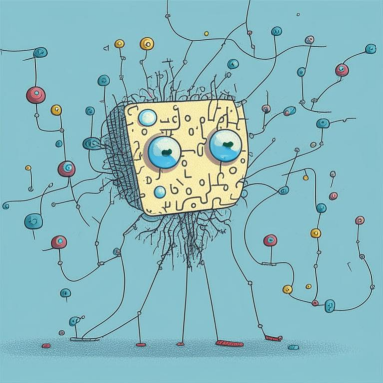

## Посмотрим корреляцию между целевой переменной и признаками

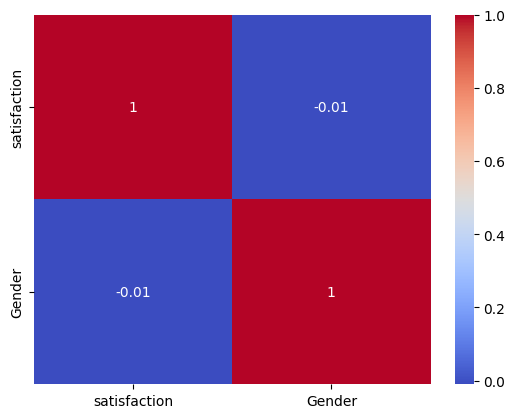

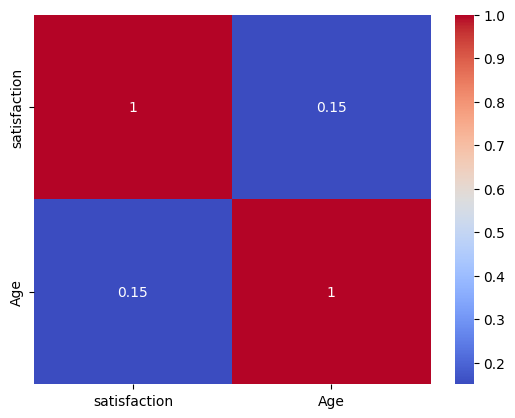

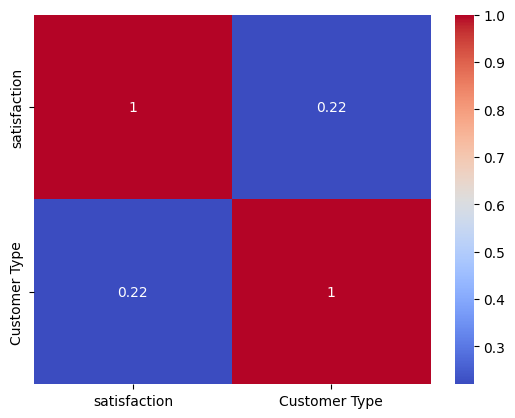

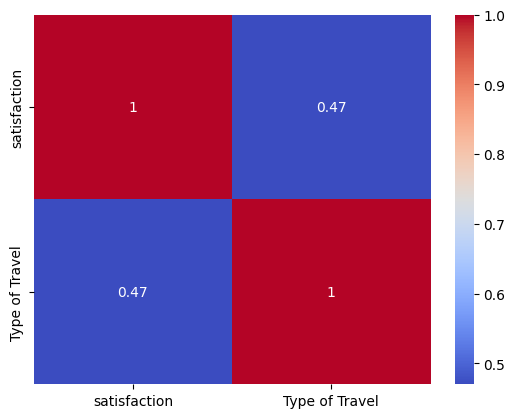

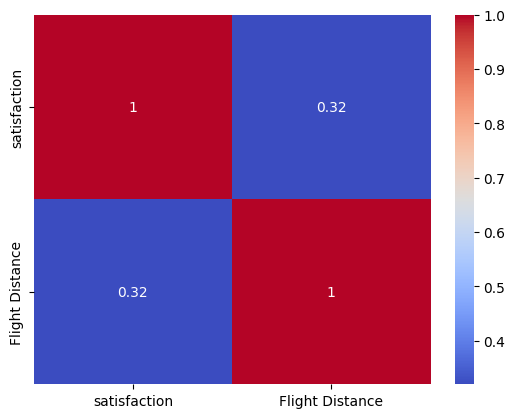

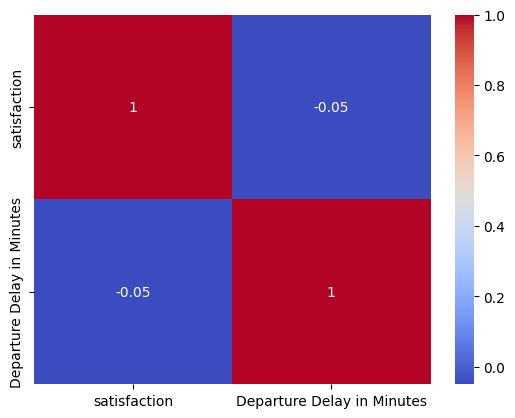

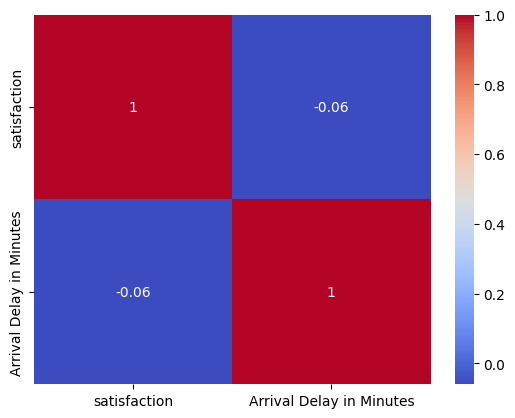

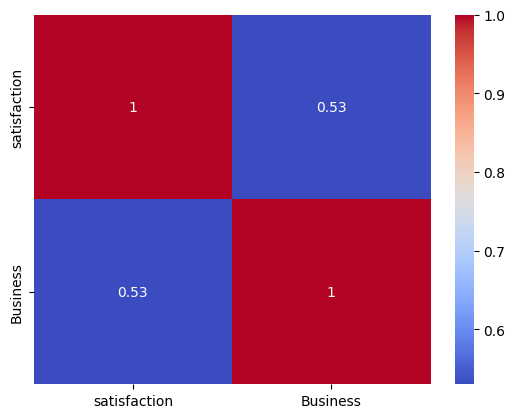

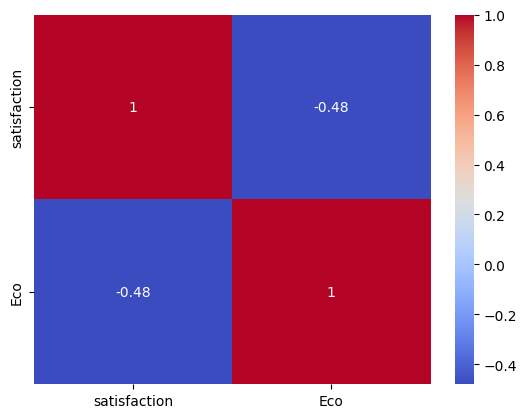

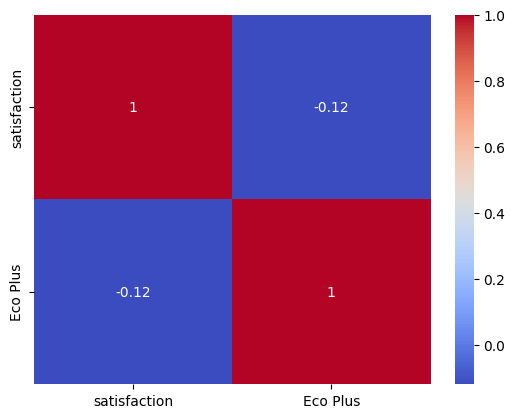

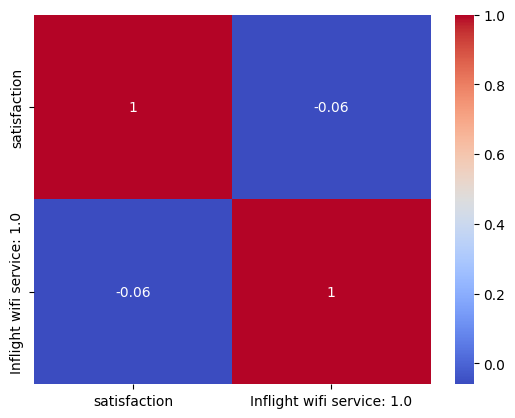

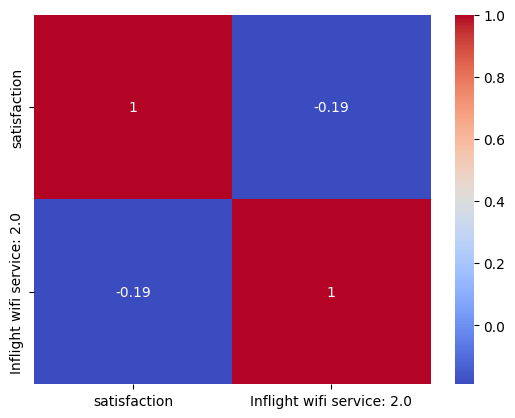

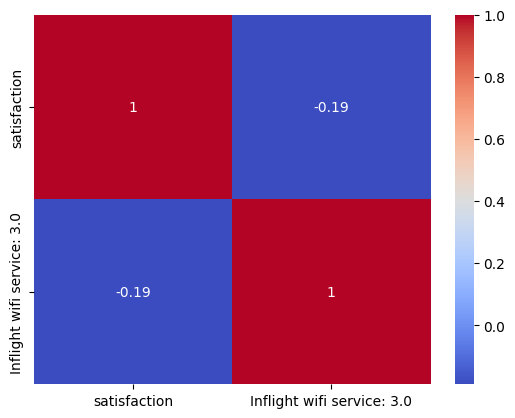

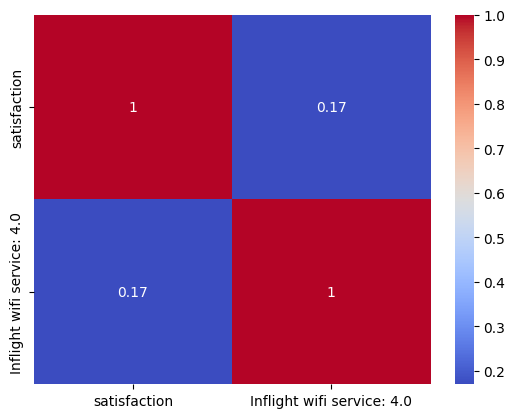

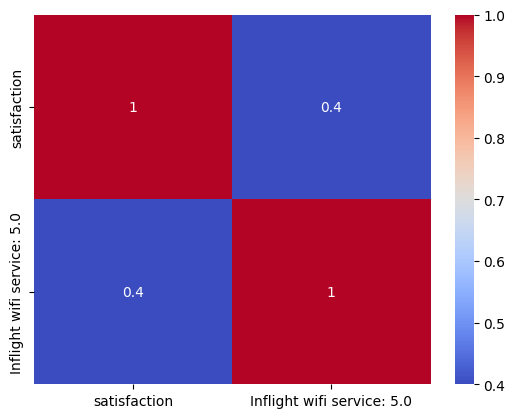

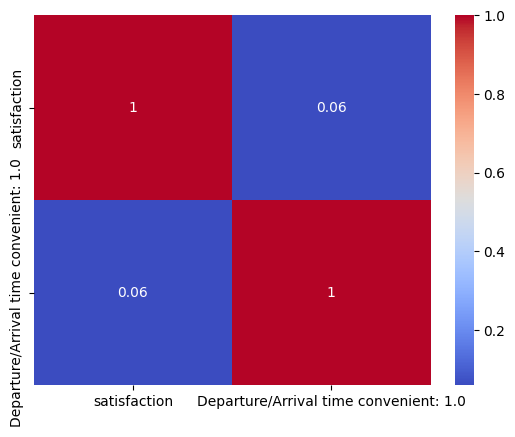

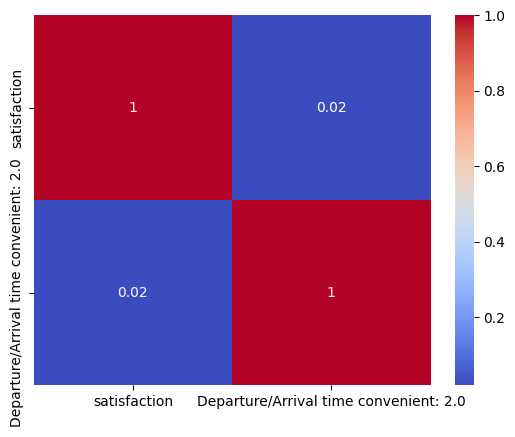

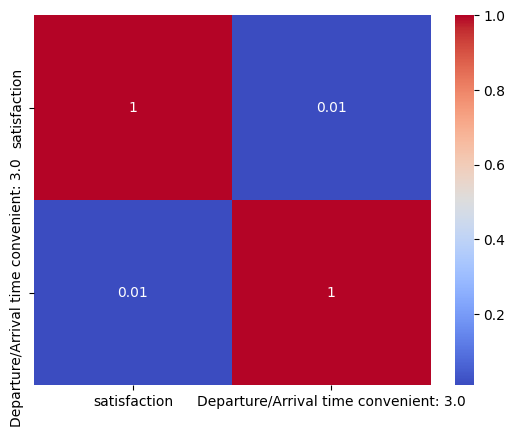

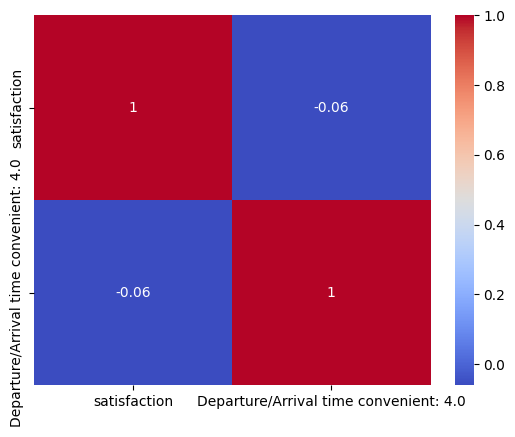

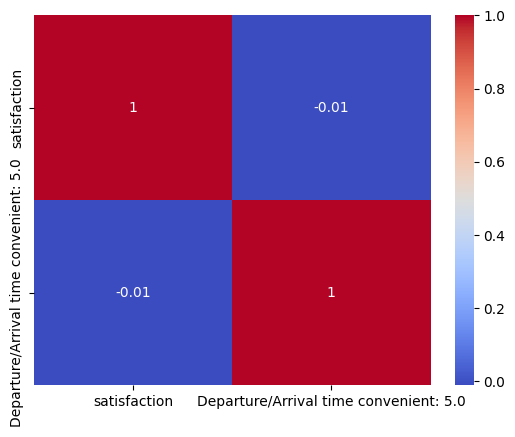

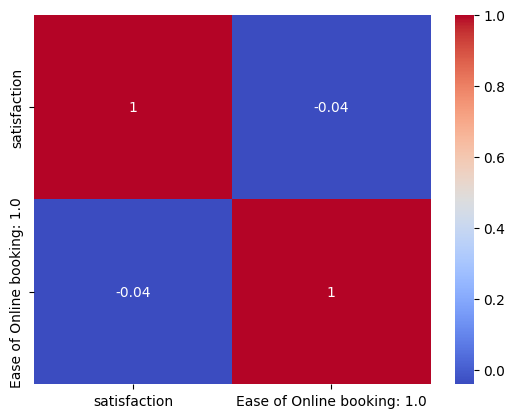

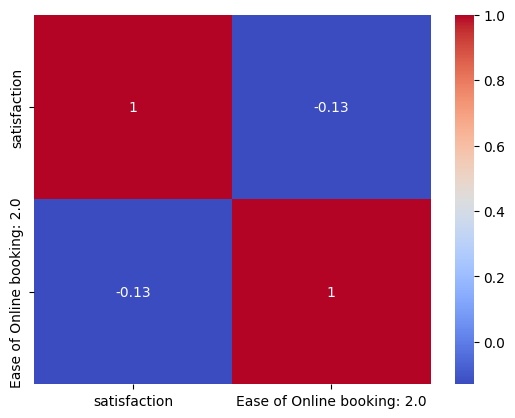

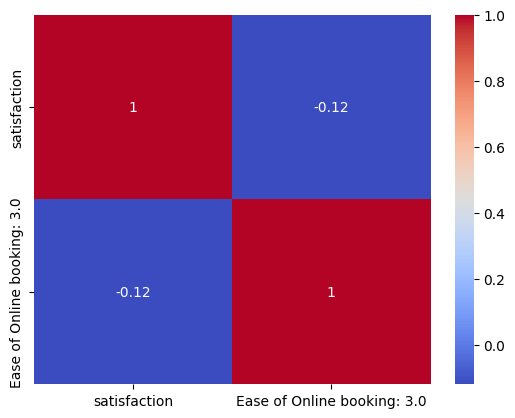

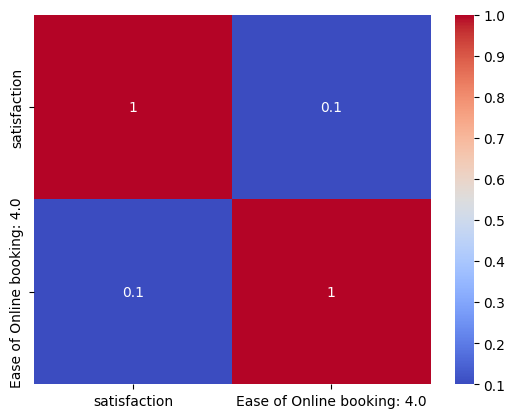

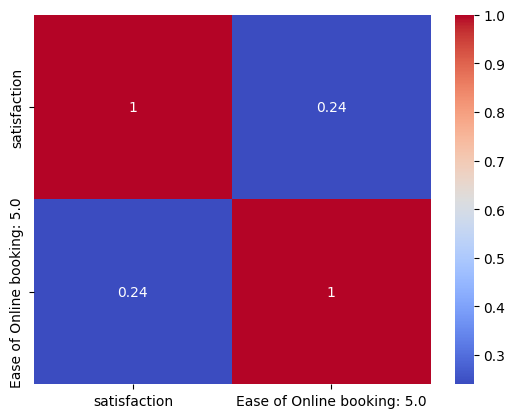

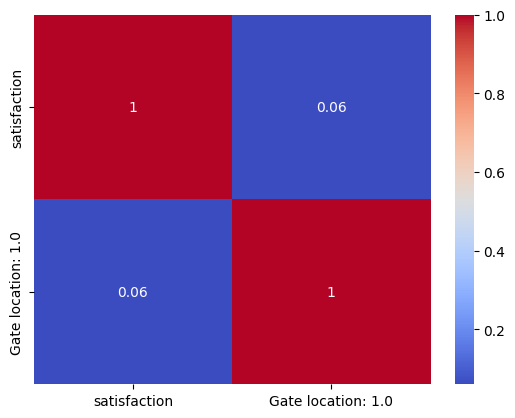

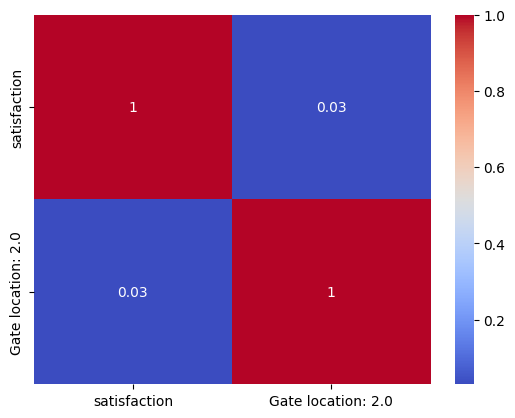

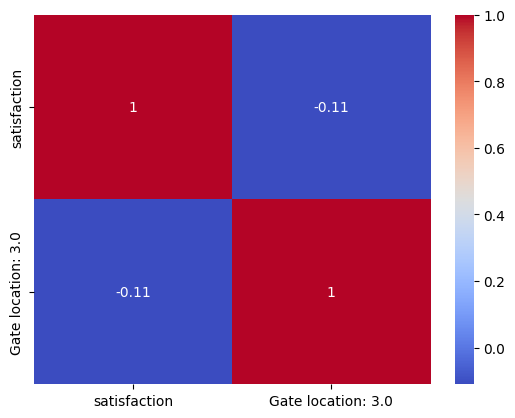

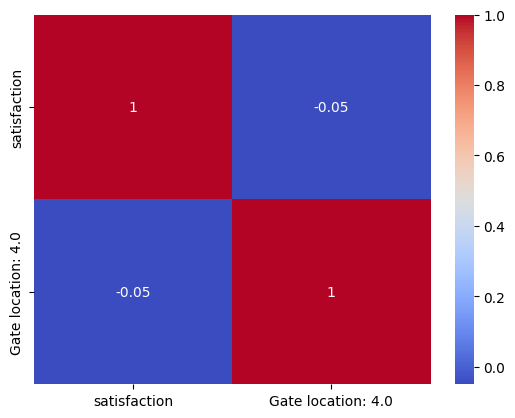

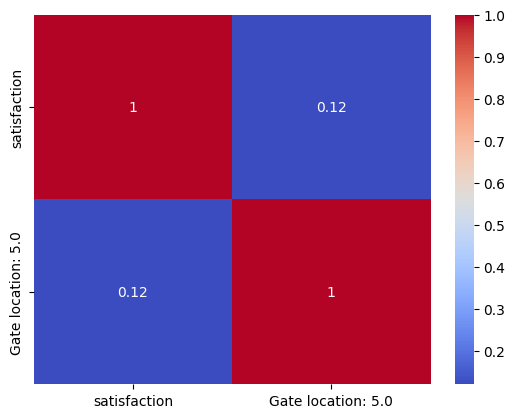

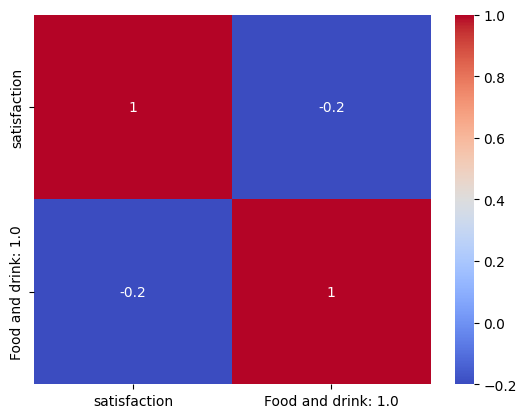

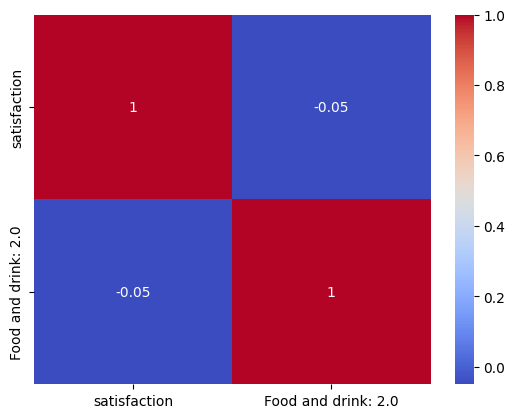

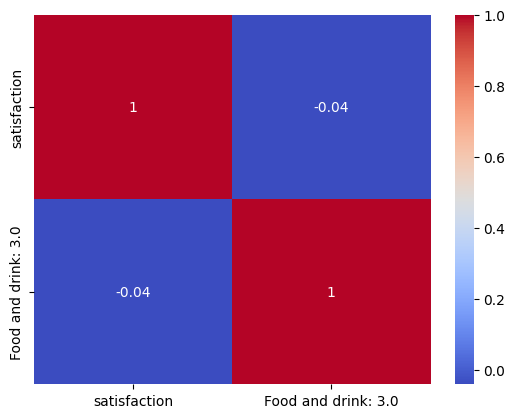

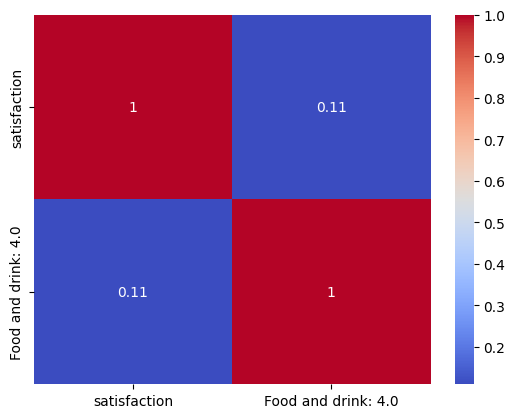

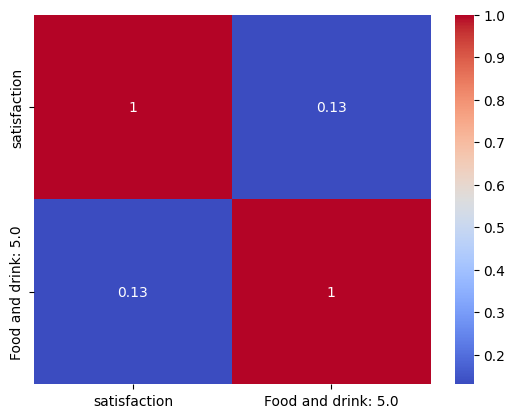

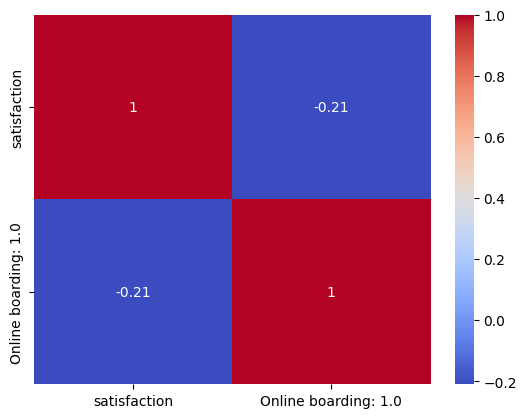

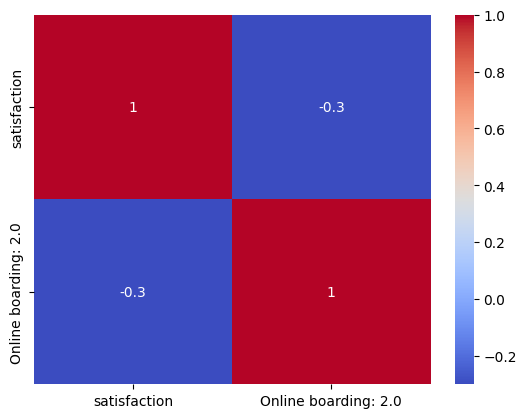

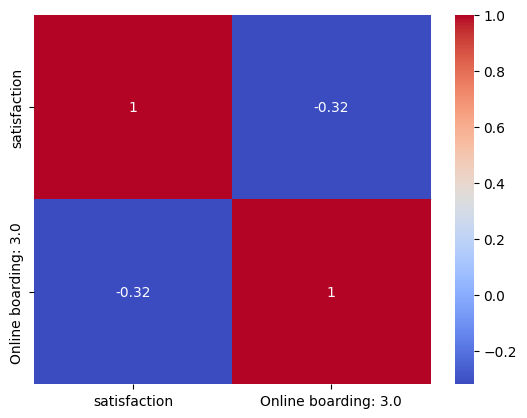

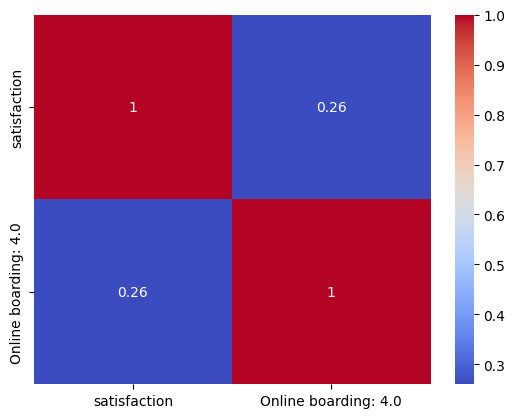

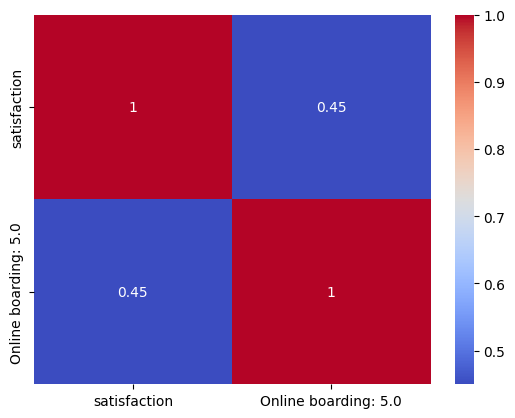

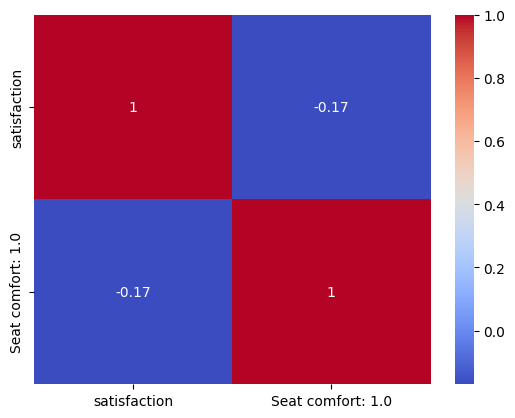

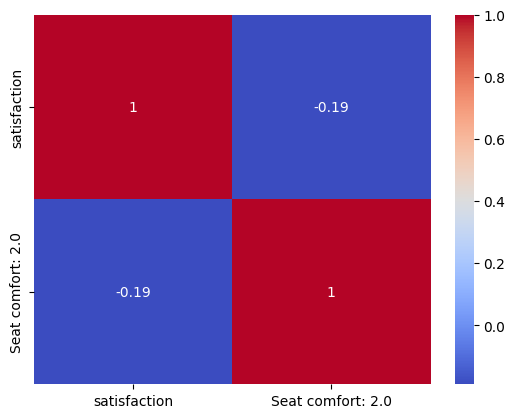

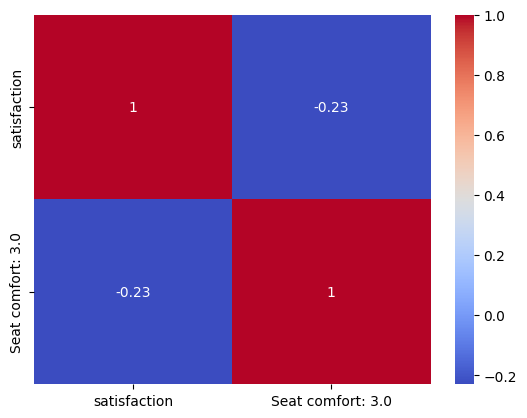

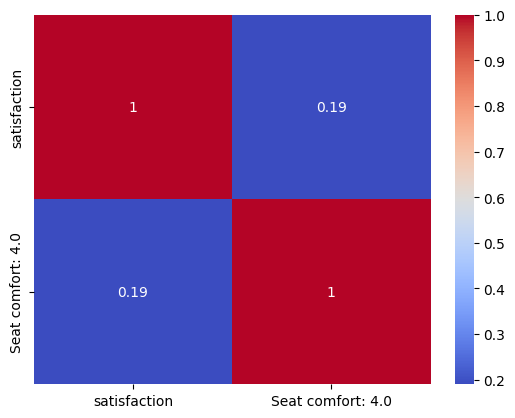

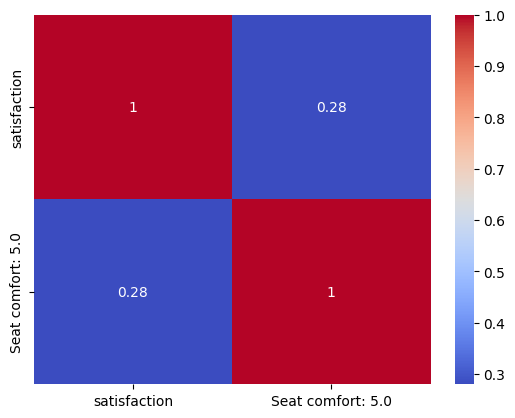

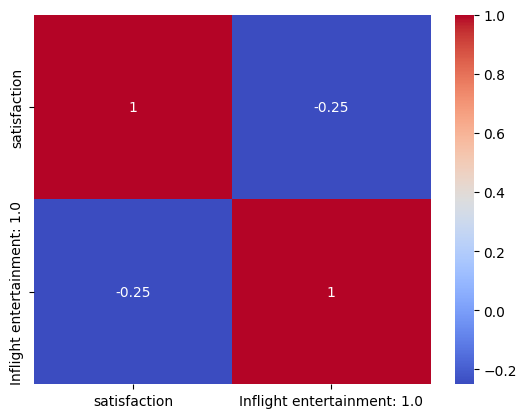

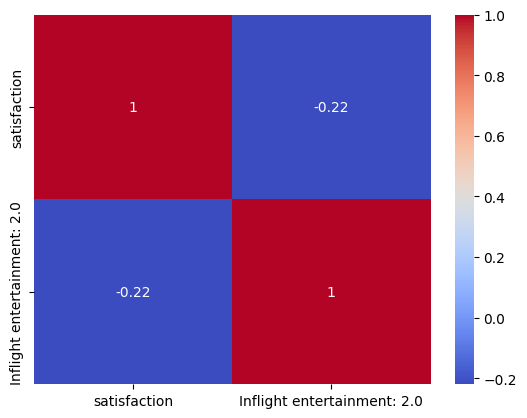

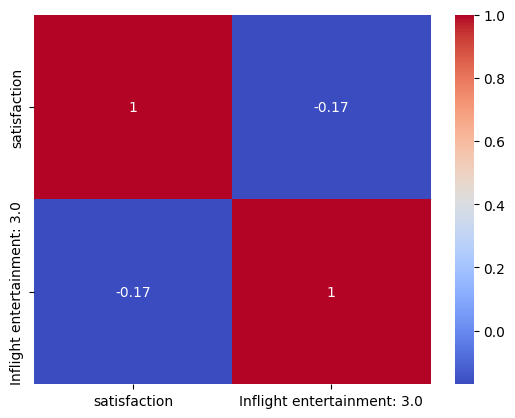

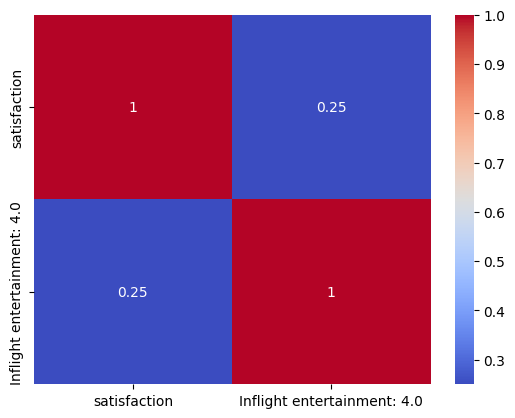

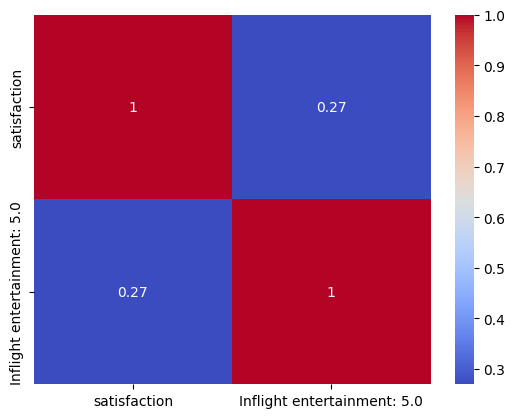

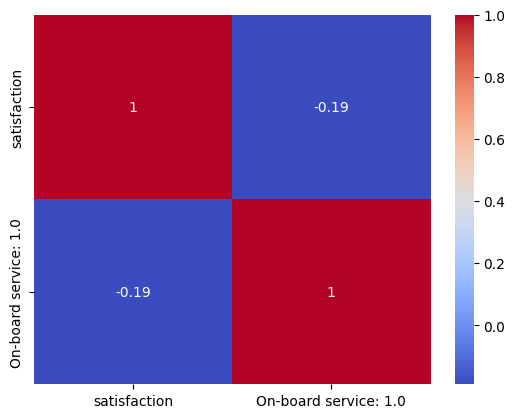

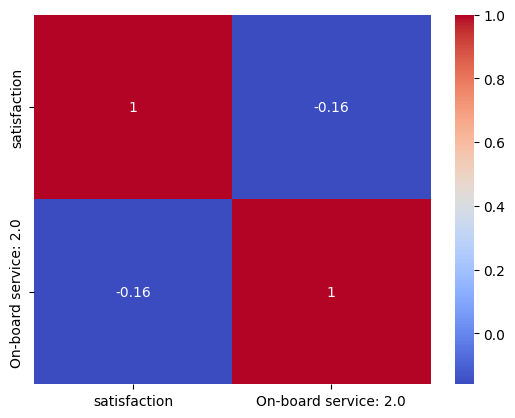

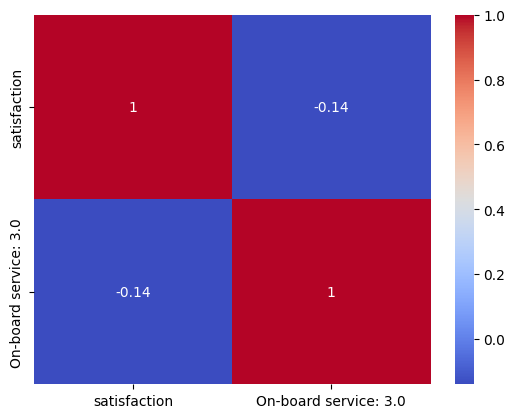

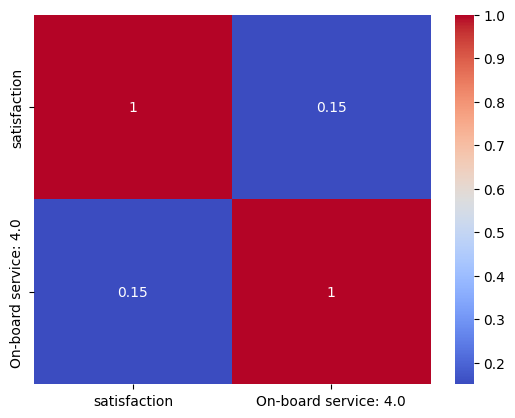

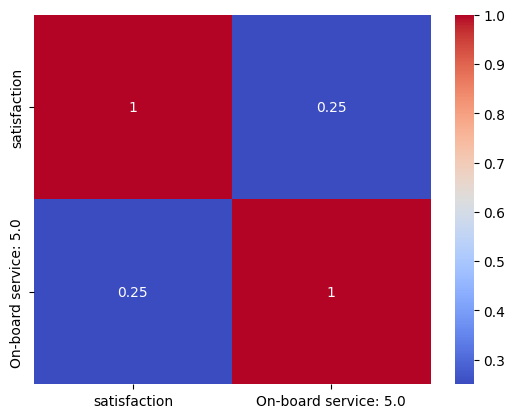

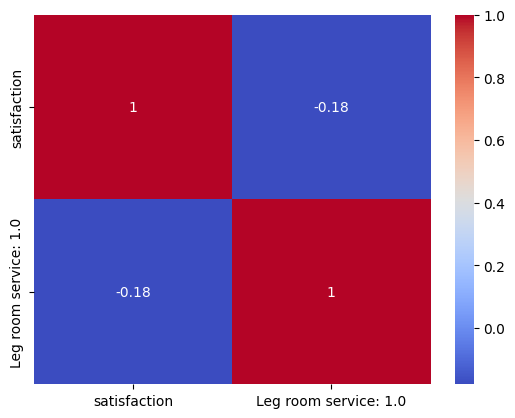

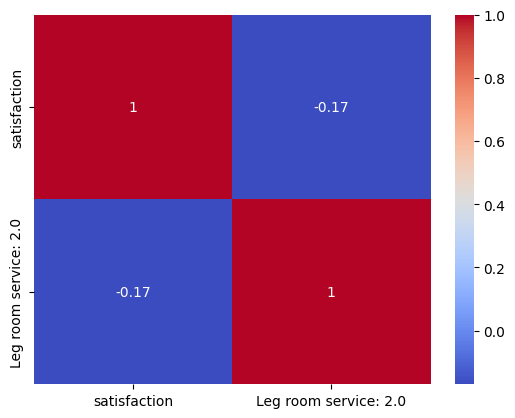

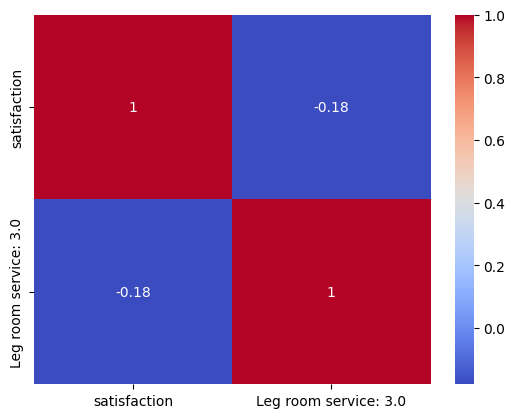

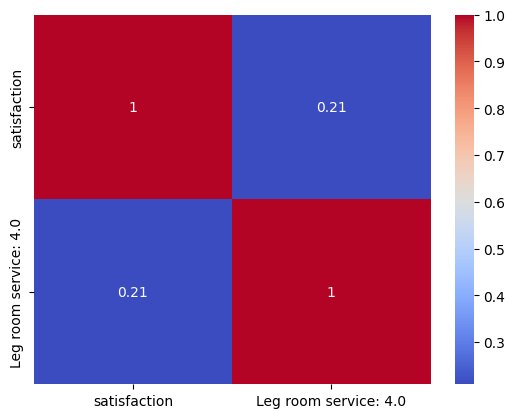

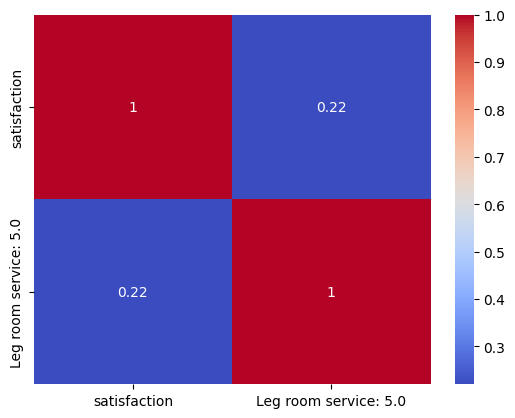

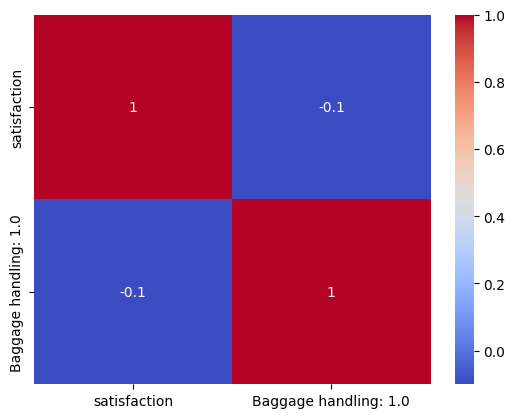

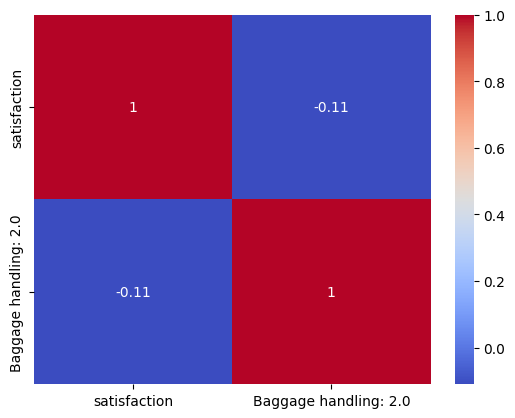

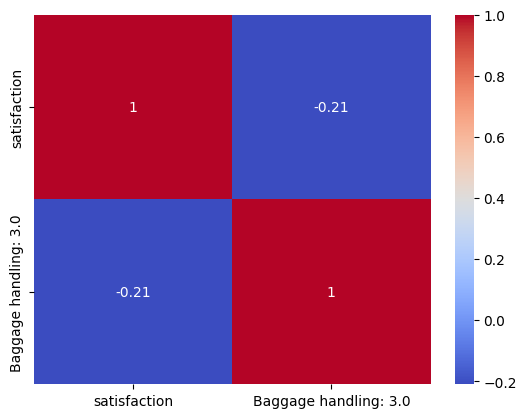

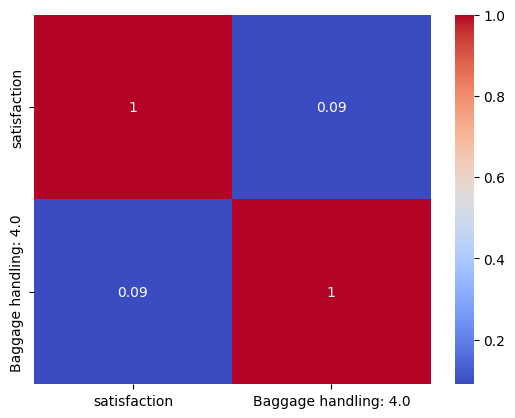

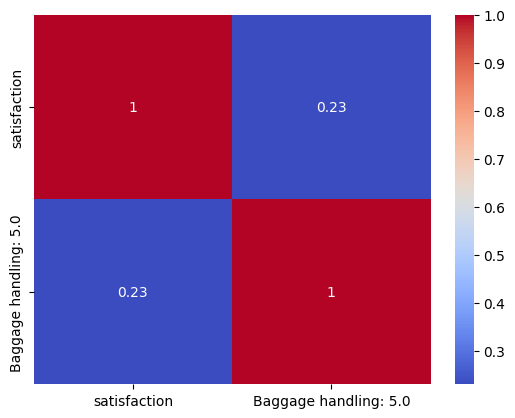

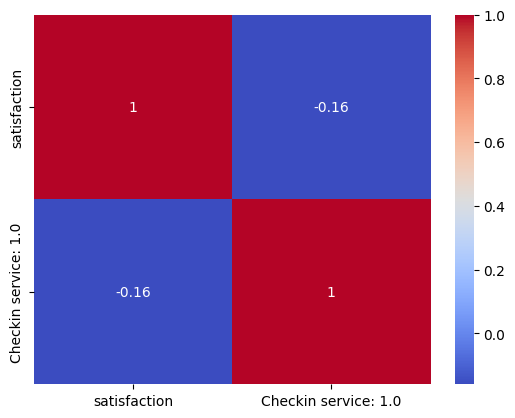

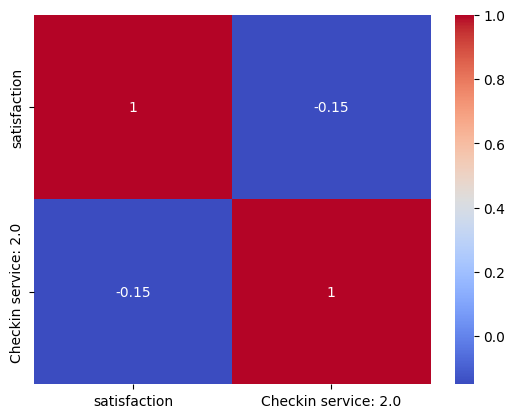

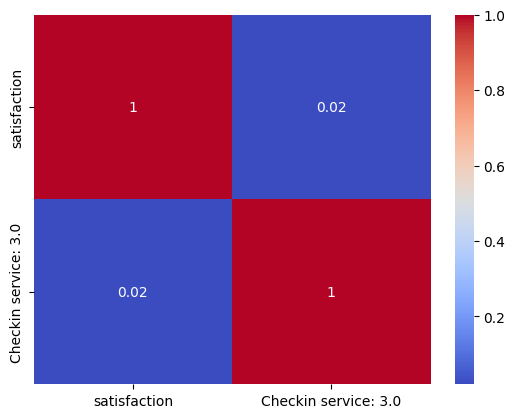

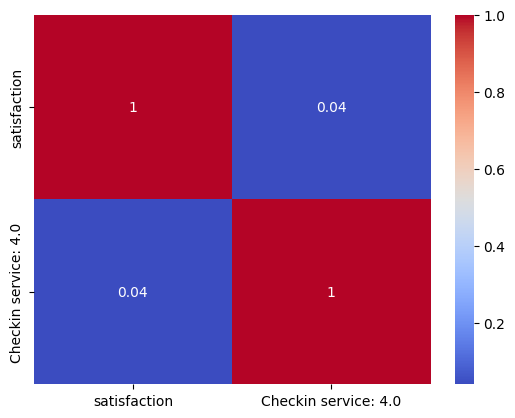

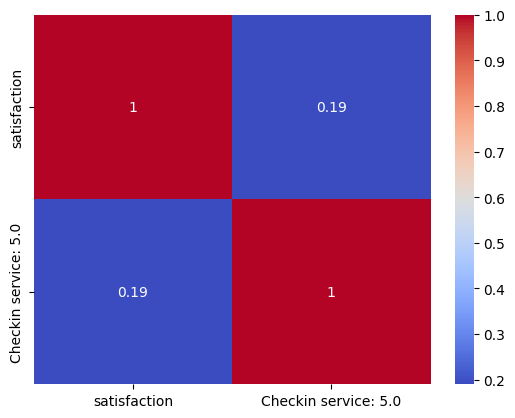

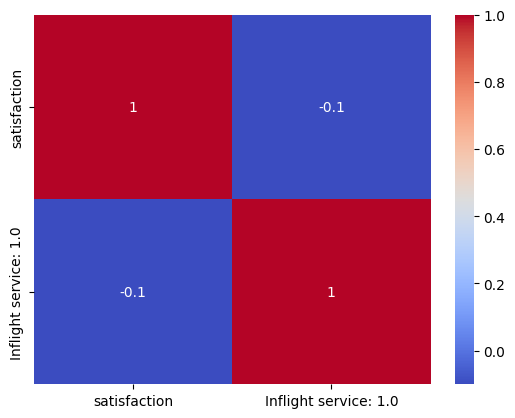

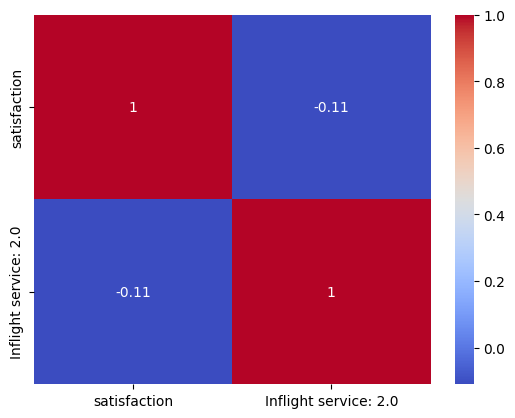

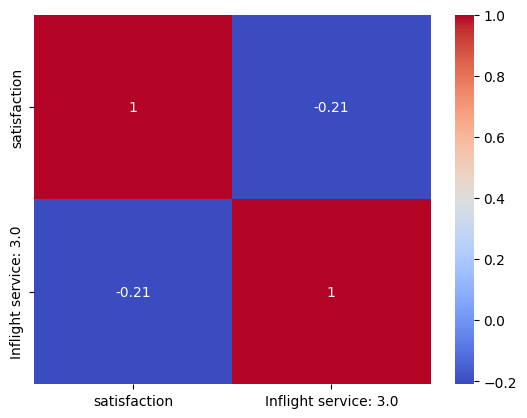

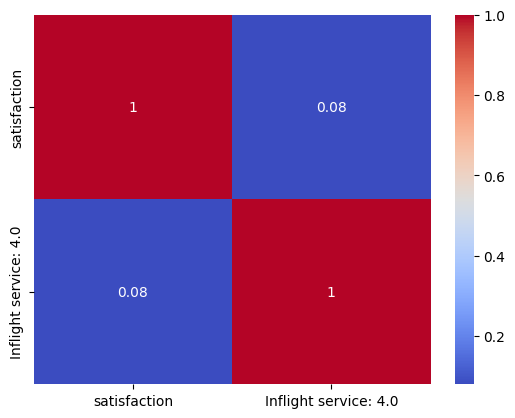

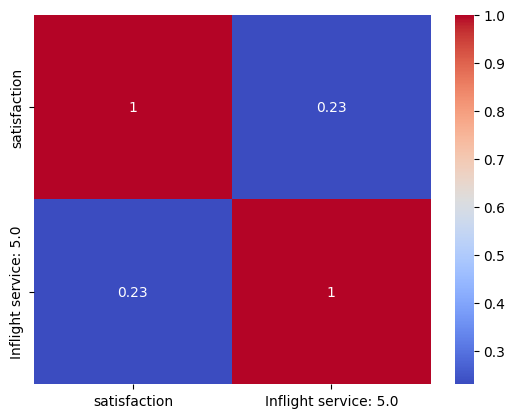

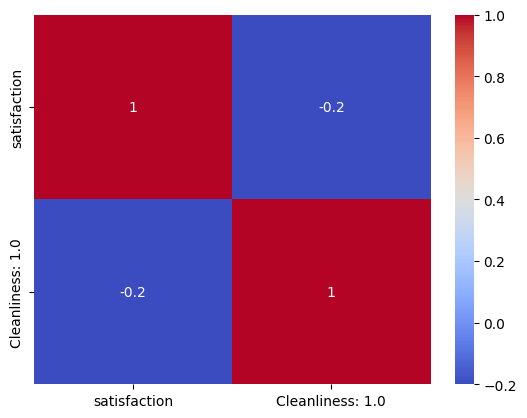

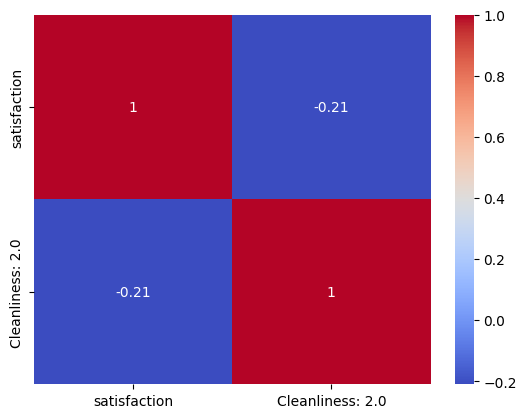

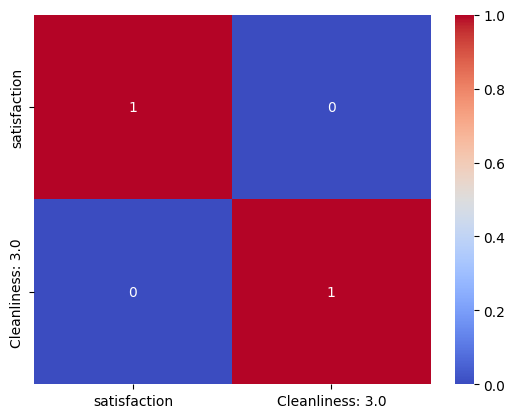

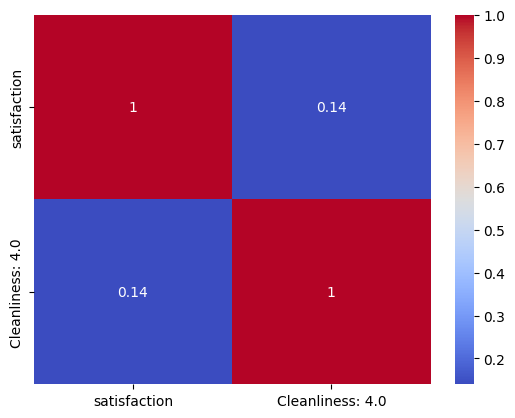

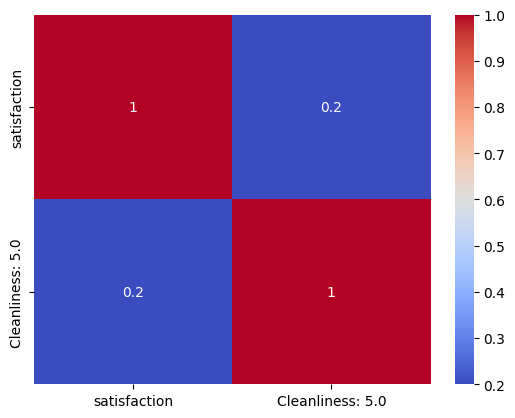

In [131]:
for column in df.drop(['satisfaction'], axis=1).columns:
  sns.heatmap(data=df[['satisfaction', column]].corr().round(2), annot=True, cmap='coolwarm')
  plt.show()


Уберём признаки с низкой корреляции

In [132]:
X = df.drop(['satisfaction', 'Gender', 'Age', 'Departure Delay in Minutes',
             'Arrival Delay in Minutes', 'Eco Plus',
             'Inflight wifi service: 1.0',
             'Departure/Arrival time convenient: 1.0',
             'Departure/Arrival time convenient: 2.0',
             'Departure/Arrival time convenient: 3.0',
             'Departure/Arrival time convenient: 4.0',
             'Departure/Arrival time convenient: 5.0',
             'Ease of Online booking: 1.0',
             'Ease of Online booking: 2.0',
             'Ease of Online booking: 3.0',
             'Ease of Online booking: 4.0',
             'Gate location: 1.0', 'Gate location: 2.0',
             'Gate location: 3.0', 'Gate location: 4.0',
             'Gate location: 5.0', 'Food and drink: 2.0',
             'Food and drink: 3.0', 'Food and drink: 4.0',
             'Food and drink: 5.0', 'On-board service: 3.0',
             'Baggage handling: 1.0', 'Baggage handling: 2.0',
             'Baggage handling: 4.0', 'Checkin service: 3.0',
             'Checkin service: 4.0', 'Inflight service: 1.0',
             'Inflight service: 2.0', 'Inflight service: 4.0',
             'Cleanliness: 3.0', 'Cleanliness: 4.0'], axis=1)
y = df['satisfaction']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_STATE)

X_train.shape, X_test.shape

((55280, 45), (27228, 45))

In [134]:
X_scaler = MinMaxScaler(feature_range=(0, 1))

X_scaler.fit(X_train)
X_trainMX = X_scaler.transform(X_train)
X_testMX = X_scaler.transform(X_test)

## Логистическая регрессия

In [136]:
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_trainMX, y_train)

logistic_regression_model_pred = logistic_regression_model.predict(X_testMX)

In [137]:
confusion_matrix(y_test, logistic_regression_model_pred)

array([[14624,   819],
       [ 1027, 10758]])

In [138]:
round(logistic_regression_model.score(X_testMX, y_test), 4)

0.9322

# ***Выгружаем модель и скейлер***

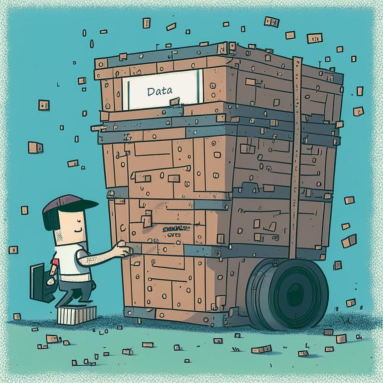

In [149]:
# Сохраняем скейлер
import joblib
joblib.dump(X_scaler, 'scaler.pkl')

['scaler.pkl']

In [314]:
with open('model.pickle', 'wb') as f:
    pickle.dump(logistic_regression_model, f)